In [2]:
ls

002_meas_CO_ground_state_B_X_thermal_beam
003_meas_CO_ground_state_B_X_thermal_beam
004_100_mbar_CO_0.002nm
20200109CrystalcharacterizationDocument.odt
20200619-0405050630.jpg
20200627peakpositionlocaorhenenm_v04.txt
20200721peakpositionlocaoropoc_values_v04.txt
20200721peakpositionlocaoroposingle_fringe_v04.txt
20200721peakpositionlocaoropowl_tseries_v04.txt
2020_2021_MidIROPO_development_MasterNB.odm
2020_MidIROPO_development_MasterNB.odm
2020_MidIROPO_development_MasterNB_edited.odm
2020_MidIROPO_development_MasterNB_edited.pdf
2020_MidIROPO_development_MasterNB_edited_v2.pdf
20210402_OPO_532_nm_fringe_appearance/
20210422_LiNbO3_testing_table.odt
20210605_OPO_532_beamprofile/
20210709Labview program testing/
20210906customoptics/
20220307_152018.jpg
20220307_174612.jpg
20220307_174630.jpg
20220325_233247.jpg
20220325_233250(0).jpg
20220325_233250.jpg
20220325_233354.jpg
20220325_233355.jpg
20220325_233359.jpg
20220325_233430.jpg
20220325_233448.jpg
20220325_233641.jpg
20220415_1549

Bv= 1.9400330749999999 cm-1 Dv= 6.12147e-06 cm-1
Bv for X to C transition= 1.953225 cm-1 B2= 6.17e-06 cm-1
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch


<Figure size 1440x720 with 0 Axes>

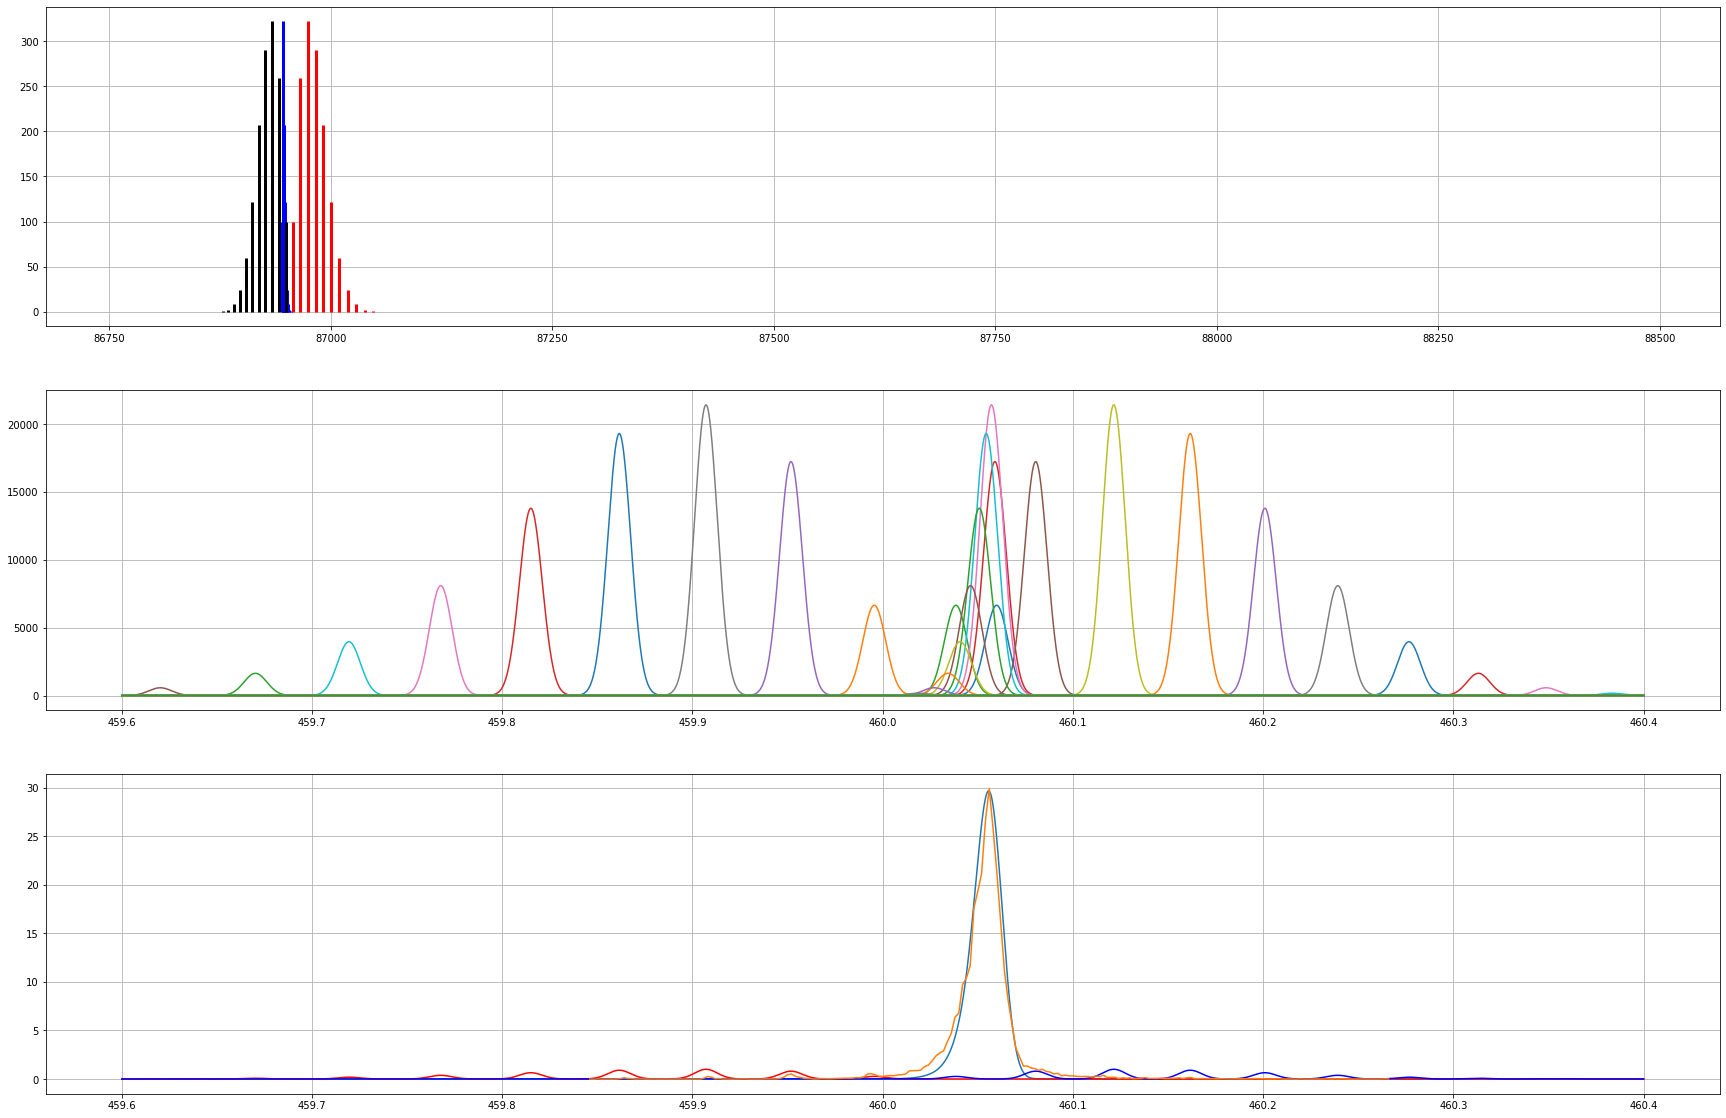

In [5]:
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
betaex1=0
gammaex1=0


#### for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0)

T01=92903
BeB1=1.9771
DeB1=0.0000065
alphaeB1=0.0254
v=0
betaeB1=0
gammaeB1=0

#### for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0)
#T02=91919.063
T02=91916.063
BeB2=1.943425
DeB2=6.17E-06
alphaeB2=0.0196
v2=0
betaeB2=0
gammaeB2=0

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)

T03=86945.2 #T0 from NIST
BeB3=1.9612 #Be from NIST
DeB3=0.0000071 #De from NIST
alphaeB3=0.0261 #alpha_e from NIST
v3=2
betaeB3=0  #Beta_e not given
gammaeB3=0 #gamma_e not given

#### for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0)
T04=65075.7
BeB4=1.6115
DeB4=0.00000733
alphaeB4=0.02325
v4=0
betaeB4=0
gammaeB4=0

Bv=Bex1+alphaex1*(v1+1/2)+gammaex1*(v1+1/2)**2
Dv=Dex1+betaex1*(v1+1/2)

Bv1=BeB1+alphaeB1*(v+1/2)+gammaeB1*(v+1/2)**2
Dv1=DeB1+betaeB1*(v+1/2)

Bv2=BeB2+alphaeB2*(v2+1/2)+gammaeB2*(v2+1/2)**2
Dv2=DeB2+betaeB2*(v2+1/2)

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
Bv3=BeB3+alphaeB3*(v3+1/2)+gammaeB3*(v3+1/2)**2
Dv3=DeB3+betaeB3*(v3+1/2)

Bv4=BeB4+alphaeB4*(v4+1/2)+gammaeB3*(v4+1/2)**2
Dv4=DeB4+betaeB4*(v4+1/2)


print('Bv=',Bv,'cm-1','Dv=',Dv,'cm-1')
#print('Bv for X to B transition=',Bv1,'cm-1','B1=',Dv1,'cm-1')
print('Bv for X to C transition=',Bv2,'cm-1','B2=',Dv2,'cm-1')
#print('Bv for X to A $\Pi$ transition=',Bv3,'cm-1','B3=',Dv3,'cm-1')
import matplotlib.pyplot as plt
#Given the following parameters
import random
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy
D4=Dv4
D3=Dv3
D2=Dv2
D1=Dv1
D=Dv
#D=0

J = 100
B = Bv
B1=Bv1
B2=Bv2
B3=Bv3
B4=Bv4
Transitionfreq=[]

def En(J,B):  return B*J*(J+1)-D*((J*(J+1))**2) # Energy function for groound state
def Em(J,B1): return B1*J*(J+1)-D1*((J*(J+1))**2) # Energy function for B sigma state
def El(J,B2): return B2*J*(J+1)-D2*((J*(J+1))**2)# Enrgy function for C sigma state
#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
def Ek(J,B3): return B3*J*(J+1)-D3*((J*(J+1))**2)# Energy function for A pi state
def Ej(J,B4): return B4*J*(J+1)-D4*((J*(J+1))**2)

'''plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')'''
val = 1.1*En(J,B)
val2= 1.1*Em(J,B1)
val3= 1.1*El(J,B2)
val4= 1.1*El(J,B2)


Qbranch_gtoe=[]
Sbranch_gtoe=[]
QBwavelength=[]
SBwavelength=[]

CQbranch_gtoe=[]
CSbranch_gtoe=[]
CObranch_gtoe=[]
CQBwavelength=[]
CSBwavelength=[]
COBwavelength=[]

PQbranch_gtoe=[]
PSbranch_gtoe=[]
PObranch_gtoe=[]
PQBwavelength=[]
PSBwavelength=[]
POBwavelength=[]


Pi_Qbranch_gtoe=[]
Pi_Sbranch_gtoe=[]
Pi_QBwavelength=[]
Pi_SBwavelength=[]


#ax.axis([0.0,10.0,0.0,val])
#ax.set_ylabel(r'$E_J$ (cm-1)')
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(En(J,B))
    #ax.text(0.6, En(J,B)+0.01*val, str1, fontsize=16, color="red")
    #ax.hlines(En(J,B), 0.0, 5, linewidth=1.8, linestyle='-', color="red")
    #Transitionfreq.append(En(J+1,B)-En(J,B))
    #print('Transition frequency',En(J+1,B)-En(J,B),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Em(J,B1))
    #ax.text(7, Em(J,B1)+0.01*val2, str1, fontsize=16, color="red")
    #ax.hlines(Em(J,B1), 7, 20, linewidth=1.8, linestyle='-', color="blue")
    Transitionfreq.append(Em(J+1,B1)-Em(J,B1))
    #print('Transition frequency',Em(J+1,B1)-Em(J,B1),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(El(J,B2))
    #ax.text(7, El(J,B2)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(El(J,B2), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(El(J+1,B2)-El(J,B2))
    
################################# for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)##################################################
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ek(J,B3))
    #ax.text(7, Ek(J,B3)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(Ek(J,B3), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))

   ## Here for 4th state
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ej(J,B4))
    #ax.text(7, Ej(J,B4)+0.01*val4, str1, fontsize=16, color="red")
    #ax.hlines(Ej(J,B4), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))
    
    gtoe1=Em(J,B1)-En(J,B)+T01 # 86916.2 is taken from the paper 
    gtoe2=Em(J+2,B1)-En(J,B)+T01
    
    
    Ogtoe3=Em(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=Em(J-2,B2)-En(J,B)+T02
    
    gtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    gtoe4=El(J+2,B2)-En(J,B)+T02
    
    
    
    
    ### For C excited state, O branch
    Ogtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=El(J-2,B2)-En(J,B)+T02

    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    gtoe5=Ek(J,B3)-En(J,B)+T03  # 86916.2 is taken from the paper 
    gtoe6=Ek(J+2,B3)-En(J,B)+T03
    gtoeO6=Ek(J-2,B3)-En(J,B)+T03
    #####################################
    gtoe7=Ej(J,B4)-En(J,B)+T04 # 86916.2 is taken from the paper 
    gtoe8=Ej(J+2,B4)-En(J,B)+T04
    
    Qbranch_gtoe.append(gtoe1/2) ## Because in the energy expression 2 photon is considered, for 1 photon, we need to devide it by 2
    Sbranch_gtoe.append(gtoe2/2)
    
    QBwavelength.append(2e7/gtoe1)
    SBwavelength.append(2e7/gtoe2)
    
    CQbranch_gtoe.append(gtoe3)
    CSbranch_gtoe.append(gtoe4)
    CObranch_gtoe.append(Ogtoe4)
    
    CQBwavelength.append((2e7/gtoe3))
    CSBwavelength.append(2e7/gtoe4)
    COBwavelength.append(2e7/Ogtoe4)
    
    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    #PQbranch_gtoe.append(gtoe5/2)
    #PSbranch_gtoe.append(gtoe6/2)
    #PObranch_gtoe.append(gtoeO6/2)
    
    PQbranch_gtoe.append(gtoe5)
    PSbranch_gtoe.append(gtoe6)
    PObranch_gtoe.append(gtoeO6)
    
    PQBwavelength.append(2e7/gtoe5)
    PSBwavelength.append(2e7/gtoe6)
    POBwavelength.append(2e7/gtoeO6)
    
    
    
    
    
    Pi_Qbranch_gtoe.append(gtoe7/2)
    Pi_Sbranch_gtoe.append(gtoe8/2)
    
    Pi_QBwavelength.append(2e7/gtoe7)
    Pi_SBwavelength.append(2e7/gtoe8)
    
    
    
#print('Q branch for X to Pi transition and wavelength in nm \n',Qbranch_gtoe)
'''print('for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0) (2+1 REMPI)')
print(QBwavelength)
print('   ')
#print('S branch for X to Pi transition and wavelength in nm\n',Sbranch_gtoe) 
print(SBwavelength)
print('   ')'''
'''print('Q branch for X to C transition and wavelength in nm\n',CQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0) (2+1 REMPI)')
#print(CQBwavelength)
print('   ')
print('S branch for X to C transition and wavelength in nm\n ',CSbranch_gtoe) 
#print(CSBwavelength)'''
print('   ')
#print('Q branch for X to Bsigma transition and wavelength in nm\n',PQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch')
#print(PQBwavelength) # wavelength for Q branch for B state

print('   ')
#print('S branch for X to Bsigma transition and wavelength in nm\n ',PSbranch_gtoe) 
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch')
#print(PSBwavelength) # wavelength for S branch for B state
'''print('   ')
print('for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0) (2+2 REMPI)')
print('   ')
#print('Q branch for X to Api transition and wavelength in nm\n',PQbranch_gtoe)
print(Pi_QBwavelength)
#print('   ')
#print('S branch for X to Api transition and wavelength in nm\n ',PSbranch_gtoe) 
print(Pi_SBwavelength)'''

str1=r"$J = "+str(J)+r"$ "
#plt.title("Energy Levels for Different value of J \n ", fontsize=30)
str2=r"$J = "+str(J)+r"$ "
str3=r"$J = "+str(J)+r"$ "


plt.figure(figsize=(20,10))

Gaussian_points=15
Gaussian_range=2
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
Temp=40
#Temp=int(input("Enter the beam temperature (in K) = "))
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
#laserlinewidth=0.15  ##in cm-1 (linewidth of 3rd harmonics)
laserlinewidth=0.15
temp=[]
#Ni=[]
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(30,20))
'''fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()'''

'''def E(J,B1): return B2*J*(J+1)-D2*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B2*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    #NJ=(2*J+1)*math.exp(-dE*h*c/k*T)
    Ni.append(amp)'''
    
    
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
#Temp=300 # in K (Temperature of molecular beam)
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
temp=[]
Ni=[]
def E(J,B3): return B3*J*(J+1)-D1*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B3*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    Ni.append(amp)
from scipy.stats import norm
#import statistics as stats
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
  
x_data,y_data=np.loadtxt('20230828_Ground_state_spectra_measurement_for_s_branch_2.txt',unpack=True)    
ax1.vlines(PQbranch_gtoe,0, Ni,color='blue',lw=3)
ax1.vlines(PSbranch_gtoe,0, Ni,color='red',lw=3)
ax1.vlines(PObranch_gtoe,0, Ni,color='black',lw=3)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.grid(True)

from scipy.stats import norm
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
###  Q branch spectra with dye laser band width

realspectra=[]
realspectra2S=[]
realspectra2O=[]
realspectra_mean=[]
#variance=0.15
variance=0.006
#This value hasto be checked for proper resolution in the spectra
#ax2.plot(Ni)

for i in range(0,J+1):
    #x = np.linspace(229.8*2, 230.05*2, 50000)
    x = np.linspace(229.8*2, 230.2*2, 50000)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp*5e22))
    gaussQ=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    gaussS=N_J*stats.norm.pdf(x, 2*PSBwavelength[i], variance)
    gaussO=N_J*stats.norm.pdf(x, 2*POBwavelength[i], variance)
    ax2.plot(x,gaussQ)
    ax2.plot(x,gaussS)
    ax2.plot(x,gaussO)
    
    realspectra.append(gaussQ)
    realspectra2S.append(gaussS)
    realspectra2O.append(gaussO)
    
  
#############Real spectra for 
'''for i in range(0,J+1):
    x = np.linspace(45950*2, 45965*2, 5000)
    N_J=N0*((2*i)+1)*math.exp((-B2*i*(i+1))/(kb*Temp*5e22))
    gauss=N_J*stats.norm.pdf(x, CQbranch_gtoe[i], variance)
    #print(i)
    #print(gauss)
    ax2.plot(x,gauss)
    #print(N_J)
    realspectra.append(gauss)
'''
ax3.plot(x,30*(sum(realspectra)-realspectra[0]*0.15)/max(sum(realspectra)))
ax3.plot(x,(sum(realspectra2S)-realspectra2S[0]*0.15)/max(sum(realspectra2S)),color='red')
ax3.plot(x,(sum(realspectra2O)-realspectra2O[0]*0.15)/max(sum(realspectra2O)),color='blue')
ax3.plot(x_data+0.566,(30*y_data/max(y_data))-0.1)  
#ax3.set_ylim(0,1.1)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
x1,y1=np.loadtxt('20221109_OPticalpumpingdata_with_all_peaks.txt',unpack=True)
ax3.grid()
ax2.grid()

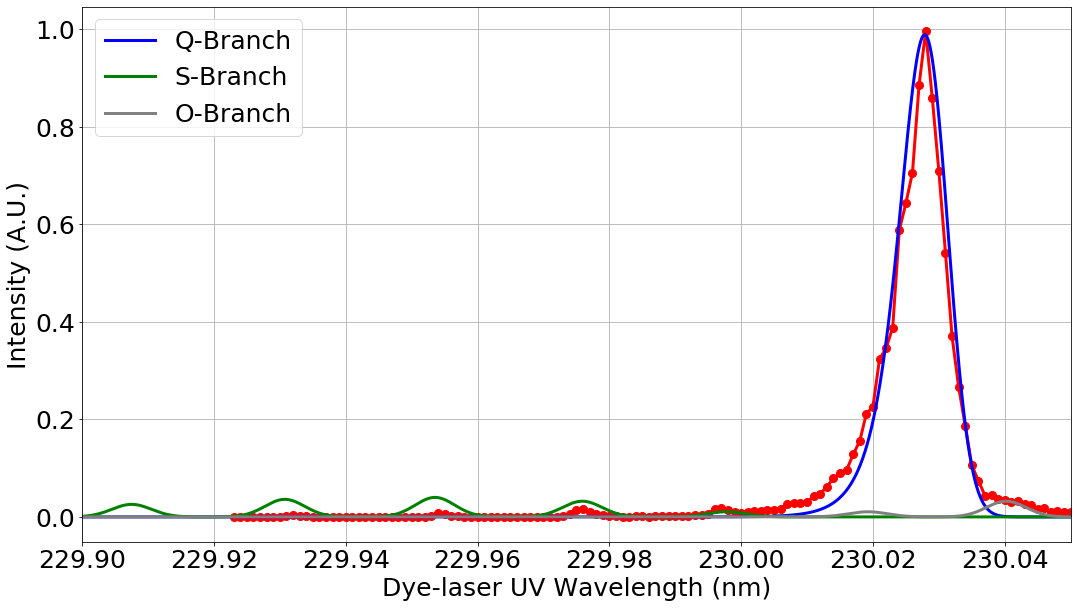

In [6]:

def cm(value): 
    return value/2.54
fig1,ax = plt.subplots(1,1, figsize=(cm(45),cm(25)))

ax.plot((x_data+0.566)/2,(30*(y_data-0.004)/(30*max(y_data))),'o-',color='red',ms=8,lw=3)  
ax.plot(x/2,30*(sum(realspectra)-realspectra[0]*0.15)/(30*max(sum(realspectra))),color='blue',lw=3,label='Q-Branch')
ax.plot(x/2,0.04*(sum(realspectra2S)-realspectra2S[0]*0.15)/max(sum(realspectra2S)),color='green',lw=3,label='S-Branch')
ax.plot(x/2,0.04*(sum(realspectra2O)-realspectra2O[0]*0.15)/max(sum(realspectra2O)),color='grey',lw=3,label='O-Branch')
ax.grid()
ax.set_xlabel("Dye-laser UV Wavelength (nm)",fontsize=25)
ax.set_ylabel("Intensity (A.U.)",fontsize=25)
ax.set_xlim(459.8/2,460.1/2)
#ax.set_ylim(-0.010,0.08)
ax.legend(fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
fig1.savefig('S1transitionfordepletionzoomed.pdf',bbox_inches='tight')

In [7]:
45965*2

91930

In [8]:
86950/2e7

0.0043475

In [9]:
43475.0/20000000

0.00217375

In [10]:
x,y=np.loadtxt(Realspectra300K.txt,unpack=True)
print(Realspectra300K.txt)

NameError: name 'Realspectra300K' is not defined

# At different temperature 

In [ ]:
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
betaex1=0
gammaex1=0


#### for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0)

T01=92903
BeB1=1.9771
DeB1=0.0000065
alphaeB1=0.0254
v=0
betaeB1=0
gammaeB1=0

#### for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0)
#T02=91919.063
T02=91916.063
BeB2=1.943425
DeB2=6.17E-06
alphaeB2=0.0196
v2=0
betaeB2=0
gammaeB2=0

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)

T03=86945.2 #T0 from NIST
BeB3=1.9612 #Be from NIST
DeB3=0.0000071 #De from NIST
alphaeB3=0.0261 #alpha_e from NIST
v3=2
betaeB3=0  #Beta_e not given
gammaeB3=0 #gamma_e not given

#### for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0)
T04=65075.7
BeB4=1.6115
DeB4=0.00000733
alphaeB4=0.02325
v4=0
betaeB4=0
gammaeB4=0

Bv=Bex1+alphaex1*(v1+1/2)+gammaex1*(v1+1/2)**2
Dv=Dex1+betaex1*(v1+1/2)

Bv1=BeB1+alphaeB1*(v+1/2)+gammaeB1*(v+1/2)**2
Dv1=DeB1+betaeB1*(v+1/2)

Bv2=BeB2+alphaeB2*(v2+1/2)+gammaeB2*(v2+1/2)**2
Dv2=DeB2+betaeB2*(v2+1/2)

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
Bv3=BeB3+alphaeB3*(v3+1/2)+gammaeB3*(v3+1/2)**2
Dv3=DeB3+betaeB3*(v3+1/2)

Bv4=BeB4+alphaeB4*(v4+1/2)+gammaeB3*(v4+1/2)**2
Dv4=DeB4+betaeB4*(v4+1/2)


print('Bv=',Bv,'cm-1','Dv=',Dv,'cm-1')
#print('Bv for X to B transition=',Bv1,'cm-1','B1=',Dv1,'cm-1')
print('Bv for X to C transition=',Bv2,'cm-1','B2=',Dv2,'cm-1')
#print('Bv for X to A $\Pi$ transition=',Bv3,'cm-1','B3=',Dv3,'cm-1')
import matplotlib.pyplot as plt
#Given the following parameters
import random
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy
D4=Dv4
D3=Dv3
D2=Dv2
D1=Dv1
D=Dv
#D=0

J = 200
B = Bv
B1=Bv1
B2=Bv2
B3=Bv3
B4=Bv4
Transitionfreq=[]

def En(J,B):  return B*J*(J+1)-D*((J*(J+1))**2) # Energy function for groound state
def Em(J,B1): return B1*J*(J+1)-D1*((J*(J+1))**2) # Energy function for B sigma state
def El(J,B2): return B2*J*(J+1)-D2*((J*(J+1))**2)# Enrgy function for C sigma state
#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
def Ek(J,B3): return B3*J*(J+1)-D3*((J*(J+1))**2)# Energy function for A pi state
def Ej(J,B4): return B4*J*(J+1)-D4*((J*(J+1))**2)

'''plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')'''
val = 1.1*En(J,B)
val2= 1.1*Em(J,B1)
val3= 1.1*El(J,B2)
val4= 1.1*El(J,B2)


Qbranch_gtoe=[]
Sbranch_gtoe=[]
QBwavelength=[]
SBwavelength=[]

CQbranch_gtoe=[]
CSbranch_gtoe=[]
CObranch_gtoe=[]
CQBwavelength=[]
CSBwavelength=[]
COBwavelength=[]

PQbranch_gtoe=[]
PSbranch_gtoe=[]
PObranch_gtoe=[]
PQBwavelength=[]
PSBwavelength=[]
POBwavelength=[]


Pi_Qbranch_gtoe=[]
Pi_Sbranch_gtoe=[]
Pi_QBwavelength=[]
Pi_SBwavelength=[]


#ax.axis([0.0,10.0,0.0,val])
#ax.set_ylabel(r'$E_J$ (cm-1)')
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(En(J,B))
    #ax.text(0.6, En(J,B)+0.01*val, str1, fontsize=16, color="red")
    #ax.hlines(En(J,B), 0.0, 5, linewidth=1.8, linestyle='-', color="red")
    #Transitionfreq.append(En(J+1,B)-En(J,B))
    #print('Transition frequency',En(J+1,B)-En(J,B),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Em(J,B1))
    #ax.text(7, Em(J,B1)+0.01*val2, str1, fontsize=16, color="red")
    #ax.hlines(Em(J,B1), 7, 20, linewidth=1.8, linestyle='-', color="blue")
    Transitionfreq.append(Em(J+1,B1)-Em(J,B1))
    #print('Transition frequency',Em(J+1,B1)-Em(J,B1),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(El(J,B2))
    #ax.text(7, El(J,B2)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(El(J,B2), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(El(J+1,B2)-El(J,B2))
    
################################# for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)##################################################
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ek(J,B3))
    #ax.text(7, Ek(J,B3)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(Ek(J,B3), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))

   ## Here for 4th state
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ej(J,B4))
    #ax.text(7, Ej(J,B4)+0.01*val4, str1, fontsize=16, color="red")
    #ax.hlines(Ej(J,B4), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))
    
    gtoe1=Em(J,B1)-En(J,B)+T01 # 86916.2 is taken from the paper 
    gtoe2=Em(J+2,B1)-En(J,B)+T01
    
    
    Ogtoe3=Em(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=Em(J-2,B2)-En(J,B)+T02
    
    gtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    gtoe4=El(J+2,B2)-En(J,B)+T02
    
    
    
    
    ### For C excited state, O branch
    Ogtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=El(J-2,B2)-En(J,B)+T02

    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    gtoe5=Ek(J,B3)-En(J,B)+T03  # 86916.2 is taken from the paper 
    gtoe6=Ek(J+2,B3)-En(J,B)+T03
    gtoeO6=Ek(J-2,B3)-En(J,B)+T03
    #####################################
    gtoe7=Ej(J,B4)-En(J,B)+T04 # 86916.2 is taken from the paper 
    gtoe8=Ej(J+2,B4)-En(J,B)+T04
    
    Qbranch_gtoe.append(gtoe1/2) ## Because in the energy expression 2 photon is considered, for 1 photon, we need to devide it by 2
    Sbranch_gtoe.append(gtoe2/2)
    
    QBwavelength.append(2e7/gtoe1)
    SBwavelength.append(2e7/gtoe2)
    
    CQbranch_gtoe.append(gtoe3)
    CSbranch_gtoe.append(gtoe4)
    CObranch_gtoe.append(Ogtoe4)
    
    CQBwavelength.append((2e7/gtoe3))
    CSBwavelength.append(2e7/gtoe4)
    COBwavelength.append(2e7/Ogtoe4)
    
    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    #PQbranch_gtoe.append(gtoe5/2)
    #PSbranch_gtoe.append(gtoe6/2)
    #PObranch_gtoe.append(gtoeO6/2)
    
    PQbranch_gtoe.append(gtoe5)
    PSbranch_gtoe.append(gtoe6)
    PObranch_gtoe.append(gtoeO6)
    
    PQBwavelength.append(2e7/gtoe5)
    PSBwavelength.append(2e7/gtoe6)
    POBwavelength.append(2e7/gtoeO6)
    
    
    
    
    
    Pi_Qbranch_gtoe.append(gtoe7/2)
    Pi_Sbranch_gtoe.append(gtoe8/2)
    
    Pi_QBwavelength.append(2e7/gtoe7)
    Pi_SBwavelength.append(2e7/gtoe8)
    
    
    
#print('Q branch for X to Pi transition and wavelength in nm \n',Qbranch_gtoe)
'''print('for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0) (2+1 REMPI)')
print(QBwavelength)
print('   ')
#print('S branch for X to Pi transition and wavelength in nm\n',Sbranch_gtoe) 
print(SBwavelength)
print('   ')'''
'''print('Q branch for X to C transition and wavelength in nm\n',CQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0) (2+1 REMPI)')
#print(CQBwavelength)
print('   ')
print('S branch for X to C transition and wavelength in nm\n ',CSbranch_gtoe) 
#print(CSBwavelength)'''
print('   ')
#print('Q branch for X to Bsigma transition and wavelength in nm\n',PQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch')
#print(PQBwavelength) # wavelength for Q branch for B state

print('   ')
#print('S branch for X to Bsigma transition and wavelength in nm\n ',PSbranch_gtoe) 
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch')
#print(PSBwavelength) # wavelength for S branch for B state
'''print('   ')
print('for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0) (2+2 REMPI)')
print('   ')
#print('Q branch for X to Api transition and wavelength in nm\n',PQbranch_gtoe)
print(Pi_QBwavelength)
#print('   ')
#print('S branch for X to Api transition and wavelength in nm\n ',PSbranch_gtoe) 
print(Pi_SBwavelength)'''

str1=r"$J = "+str(J)+r"$ "
#plt.title("Energy Levels for Different value of J \n ", fontsize=30)
str2=r"$J = "+str(J)+r"$ "
str3=r"$J = "+str(J)+r"$ "


plt.figure(figsize=(20,10))

Gaussian_points=15
Gaussian_range=2
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
Temp1=300
Temp2=400
Temp3=500
Temp4=600
Temp5=700
#Temp=int(input("Enter the beam temperature (in K) = "))
kb=1.38064852e-23 # in m2 kg s-2 K-1
#laserlinewidth=0.15  ##in cm-1 (linewidth of 3rd harmonics)
laserlinewidth=0.15
temp=[]
#Ni=[]
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(30,20))
'''fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()'''

'''def E(J,B1): return B2*J*(J+1)-D2*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B2*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    #NJ=(2*J+1)*math.exp(-dE*h*c/k*T)
    Ni.append(amp)'''
    
    
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
#Temp=300 # in K (Temperature of molecular beam)
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
temp=[]
Ni=[]
Temp=300
def E(J,B3): return B3*J*(J+1)-D1*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B3*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    Ni.append(amp)
from scipy.stats import norm
#import statistics as stats
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
  
x_data,y_data=np.loadtxt('high_power_co_photoacaustic_spectra_003',unpack=True)    
ax1.vlines(PQbranch_gtoe,0, Ni,color='blue',lw=3)
ax1.vlines(PSbranch_gtoe,0, Ni,color='red',lw=3)
ax1.vlines(PObranch_gtoe,0, Ni,color='black',lw=3)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.grid(True)

from scipy.stats import norm
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
###  Q branch spectra with dye laser band width

realspectra1=[]
realspectra2=[]
realspectra3=[]
realspectra4=[]
realspectra5=[]
realspectra_mean=[]
#variance=0.15
#variance=0.002
variance =0.004
#This value hasto be checked for proper resolution in the spectra
#ax2.plot(Ni)

for i in range(0,J+1):
    x = np.linspace(229.8*2, 230.05*2, 500)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp1*5e22))
    gauss=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    ax2.plot(x,gauss)
    realspectra1.append(gauss)
    
for i in range(0,J+1):
    x = np.linspace(229.8*2, 230.05*2, 500)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp2*5e22))
    gauss=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    ax2.plot(x,gauss)
    realspectra2.append(gauss)
    
for i in range(0,J+1):
    x = np.linspace(229.8*2, 230.05*2, 500)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp3*5e22))
    gauss=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    ax2.plot(x,gauss)
    realspectra3.append(gauss)
    
for i in range(0,J+1):
    x = np.linspace(229.8*2, 230.05*2, 500)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp4*5e22))
    gauss=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    ax2.plot(x,gauss)
    realspectra4.append(gauss)
    
for i in range(0,J+1):
    x = np.linspace(229.8*2, 230.05*2, 500)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp5*5e22))
    gauss=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    ax2.plot(x,gauss)
    realspectra5.append(gauss)
    
#ax3.plot(x,(sum(realspectra1)-realspectra1[0]*0.15)/max(sum(realspectra1)),label='300K')
#ax3.plot(x,(sum(realspectra2)-realspectra2[0]*0.15)/max(sum(realspectra2)),label='400K')
#ax3.plot(x,(sum(realspectra3)-realspectra3[0]*0.15)/max(sum(realspectra3)),label='500K')
#ax3.plot(x,(sum(realspectra4)-realspectra4[0]*0.15)/max(sum(realspectra4)),label='600K')
ax3.plot(x,(sum(realspectra5)-realspectra5[0]*0.15)/max(sum(realspectra5)),label='700K')

ax3.get_xaxis().get_major_formatter().set_useOffset(False)
x1,y1=np.loadtxt('20221109_OPticalpumpingdata_with_all_peaks.txt',unpack=True)
ax3.grid()
ax2.grid()
ax1.set_xlim(86700,87300)
#Experimentally measured data

x00,y00=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg25deg', usecols=(0,4),unpack=True)
x01,y01=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg100deg2', usecols=(0,4),unpack=True)
x02,y02=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg200deg2', usecols=(0,4),unpack=True)
x03,y03=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg300deg2', usecols=(0,4),unpack=True)
x04,y04=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg400deg2', usecols=(0,4),unpack=True)
x05,y05=np.loadtxt('20230425_scattered_beam_measurement_Surface_400degON3', usecols=(0,4),unpack=True)
#ax3.plot(x00+0.565,(y00/max(y00)),label='300K-expt')
#ax3.plot(x01+0.565,(y01/max(y01)),label='400K-expt')
#ax3.plot(x02+0.565,(y02/max(y02)),label='500K-expt')
#ax3.plot(x03+0.565,(y03/max(y03)),label='600K-expt')
#ax3.plot(x04+0.565,(y04/max(y04)),label='700K-expt')
ax3.plot(x05+0.565,(y05/max(y05))-0.2,label='700K-expt')
ax3.legend()

[-0.368 -0.282 -0.426 -0.192 -0.4   -0.309 -0.337 -0.312 -0.715 -0.5
 -0.406 -0.72  -0.644 -0.41  -0.488 -0.466 -0.869 -0.795 -1.137 -0.89
 -1.141 -1.157 -0.555 -0.65  -0.114 -0.443 -0.329 -0.776 -0.456 -0.116
 -0.035 -0.003 -0.136 -0.035 -0.056 -0.056  0.02  -0.063 -0.16  -0.059
 -0.048]


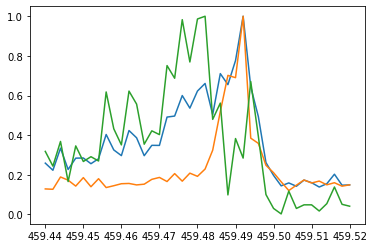

In [13]:
x005,y005=np.loadtxt('20230425_scattered_beam_measurement_Surface_400degON3', usecols=(0,4),unpack=True)
x006,y006=np.loadtxt('20230425_scattered_beam_measurement_Surface_OFF2', usecols=(0,4),unpack=True)
plt.plot(x005[20:61],y005[20:61]/max(y005[20:61]))
plt.plot(x006,y006/max(y006))
print(y006-y005[20:61])
plt.plot(x006,abs(y006-y005[20:61])/max(abs(y006-y005[20:61])))


In [ ]:
len(y005)

# Beam temperature measurement 5% beam CO in H2,

Bv= 1.9400330749999999 cm-1 Dv= 6.12147e-06 cm-1
Bv for X to C transition= 1.953225 cm-1 B2= 6.17e-06 cm-1
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch


<Figure size 1440x720 with 0 Axes>

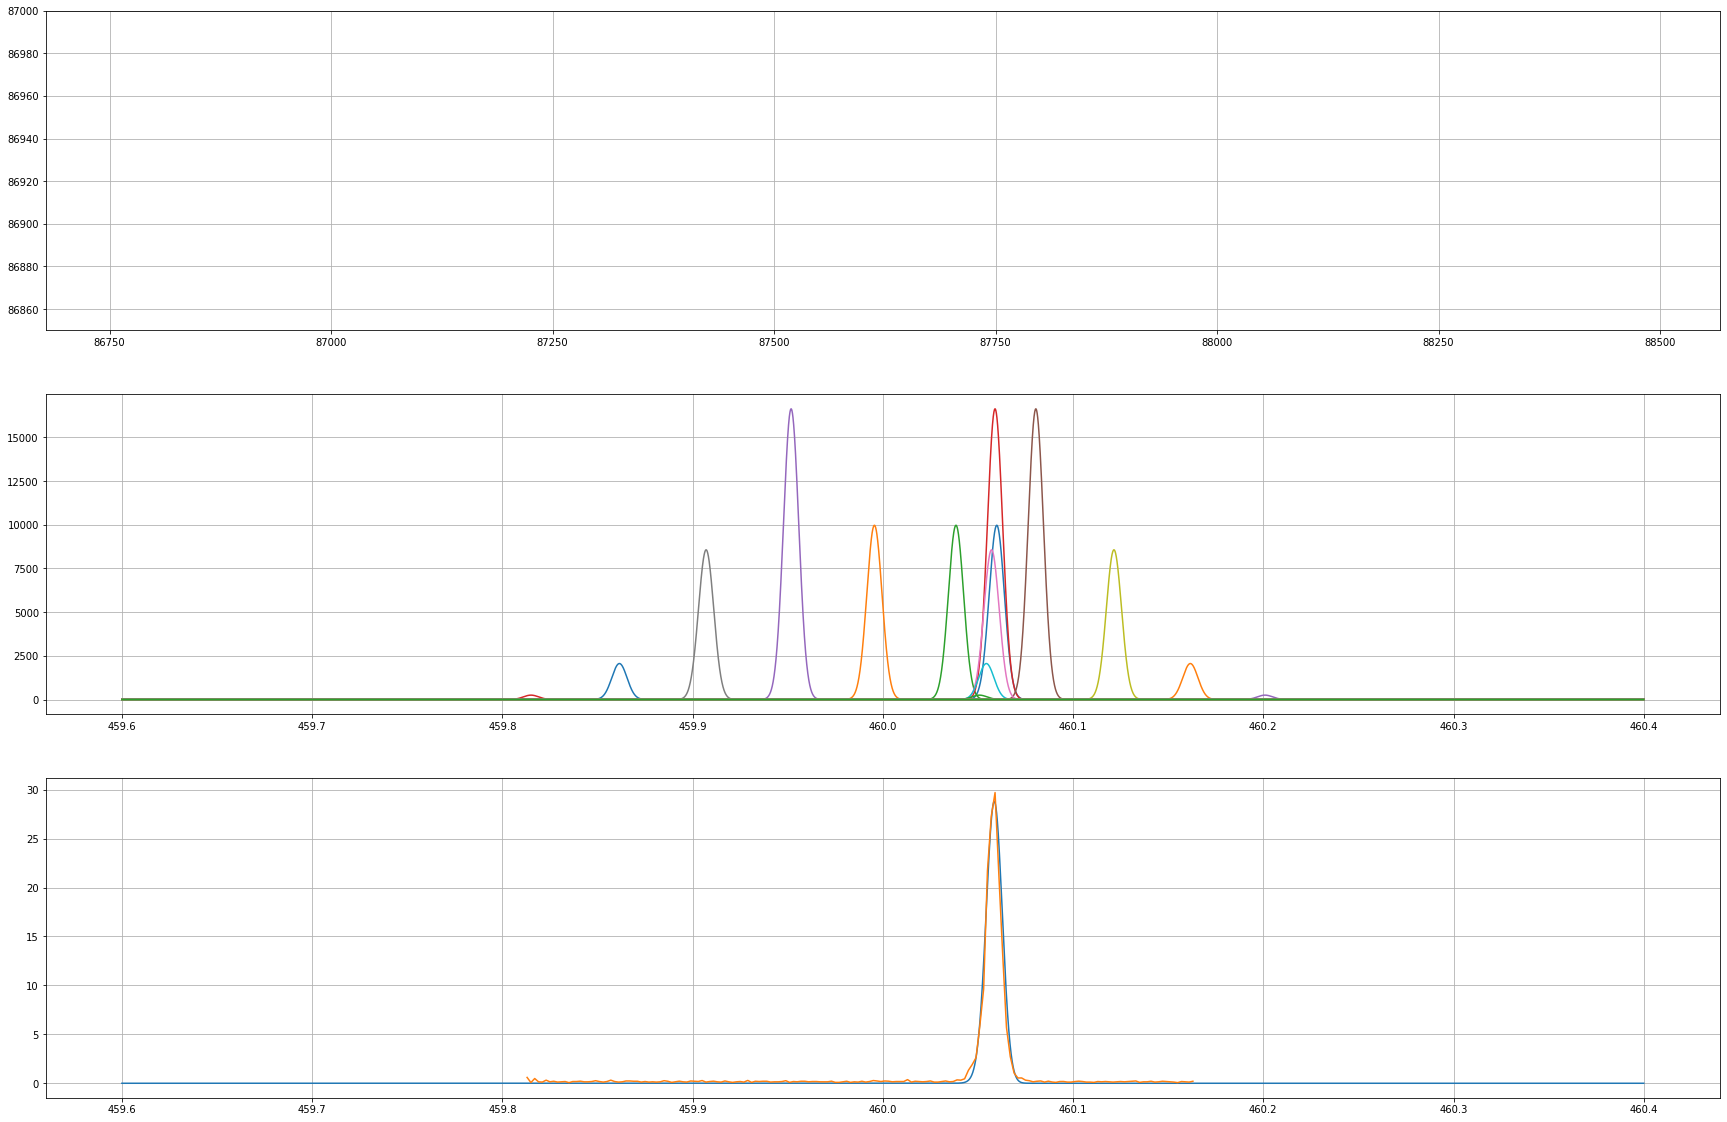

In [52]:
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
betaex1=0
gammaex1=0


#### for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0)

T01=92903
BeB1=1.9771
DeB1=0.0000065
alphaeB1=0.0254
v=0
betaeB1=0
gammaeB1=0

#### for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0)
#T02=91919.063
T02=91916.063
BeB2=1.943425
DeB2=6.17E-06
alphaeB2=0.0196
v2=0
betaeB2=0
gammaeB2=0

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)

T03=86945.2 #T0 from NIST
BeB3=1.9612 #Be from NIST
DeB3=0.0000071 #De from NIST
alphaeB3=0.0261 #alpha_e from NIST
v3=2
betaeB3=0  #Beta_e not given
gammaeB3=0 #gamma_e not given

#### for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0)
T04=65075.7
BeB4=1.6115
DeB4=0.00000733
alphaeB4=0.02325
v4=0
betaeB4=0
gammaeB4=0

Bv=Bex1+alphaex1*(v1+1/2)+gammaex1*(v1+1/2)**2
Dv=Dex1+betaex1*(v1+1/2)

Bv1=BeB1+alphaeB1*(v+1/2)+gammaeB1*(v+1/2)**2
Dv1=DeB1+betaeB1*(v+1/2)

Bv2=BeB2+alphaeB2*(v2+1/2)+gammaeB2*(v2+1/2)**2
Dv2=DeB2+betaeB2*(v2+1/2)

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
Bv3=BeB3+alphaeB3*(v3+1/2)+gammaeB3*(v3+1/2)**2
Dv3=DeB3+betaeB3*(v3+1/2)

Bv4=BeB4+alphaeB4*(v4+1/2)+gammaeB3*(v4+1/2)**2
Dv4=DeB4+betaeB4*(v4+1/2)


print('Bv=',Bv,'cm-1','Dv=',Dv,'cm-1')
#print('Bv for X to B transition=',Bv1,'cm-1','B1=',Dv1,'cm-1')
print('Bv for X to C transition=',Bv2,'cm-1','B2=',Dv2,'cm-1')
#print('Bv for X to A $\Pi$ transition=',Bv3,'cm-1','B3=',Dv3,'cm-1')
import matplotlib.pyplot as plt
#Given the following parameters
import random
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy
D4=Dv4
D3=Dv3
D2=Dv2
D1=Dv1
D=Dv
#D=0

J = 100
B = Bv
B1=Bv1
B2=Bv2
B3=Bv3
B4=Bv4
Transitionfreq=[]

def En(J,B):  return B*J*(J+1)-D*((J*(J+1))**2) # Energy function for groound state
def Em(J,B1): return B1*J*(J+1)-D1*((J*(J+1))**2) # Energy function for B sigma state
def El(J,B2): return B2*J*(J+1)-D2*((J*(J+1))**2)# Enrgy function for C sigma state
#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
def Ek(J,B3): return B3*J*(J+1)-D3*((J*(J+1))**2)# Energy function for A pi state
def Ej(J,B4): return B4*J*(J+1)-D4*((J*(J+1))**2)

'''plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')'''
val = 1.1*En(J,B)
val2= 1.1*Em(J,B1)
val3= 1.1*El(J,B2)
val4= 1.1*El(J,B2)


Qbranch_gtoe=[]
Sbranch_gtoe=[]
QBwavelength=[]
SBwavelength=[]

CQbranch_gtoe=[]
CSbranch_gtoe=[]
CObranch_gtoe=[]
CQBwavelength=[]
CSBwavelength=[]
COBwavelength=[]

PQbranch_gtoe=[]
PSbranch_gtoe=[]
PObranch_gtoe=[]
PQBwavelength=[]
PSBwavelength=[]
POBwavelength=[]


Pi_Qbranch_gtoe=[]
Pi_Sbranch_gtoe=[]
Pi_QBwavelength=[]
Pi_SBwavelength=[]


#ax.axis([0.0,10.0,0.0,val])
#ax.set_ylabel(r'$E_J$ (cm-1)')
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(En(J,B))
    #ax.text(0.6, En(J,B)+0.01*val, str1, fontsize=16, color="red")
    #ax.hlines(En(J,B), 0.0, 5, linewidth=1.8, linestyle='-', color="red")
    #Transitionfreq.append(En(J+1,B)-En(J,B))
    #print('Transition frequency',En(J+1,B)-En(J,B),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Em(J,B1))
    #ax.text(7, Em(J,B1)+0.01*val2, str1, fontsize=16, color="red")
    #ax.hlines(Em(J,B1), 7, 20, linewidth=1.8, linestyle='-', color="blue")
    Transitionfreq.append(Em(J+1,B1)-Em(J,B1))
    #print('Transition frequency',Em(J+1,B1)-Em(J,B1),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(El(J,B2))
    #ax.text(7, El(J,B2)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(El(J,B2), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(El(J+1,B2)-El(J,B2))
    
################################# for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)##################################################
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ek(J,B3))
    #ax.text(7, Ek(J,B3)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(Ek(J,B3), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))

   ## Here for 4th state
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ej(J,B4))
    #ax.text(7, Ej(J,B4)+0.01*val4, str1, fontsize=16, color="red")
    #ax.hlines(Ej(J,B4), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))
    
    gtoe1=Em(J,B1)-En(J,B)+T01 # 86916.2 is taken from the paper 
    gtoe2=Em(J+2,B1)-En(J,B)+T01
    
    
    Ogtoe3=Em(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=Em(J-2,B2)-En(J,B)+T02
    
    gtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    gtoe4=El(J+2,B2)-En(J,B)+T02
    
    
    
    
    ### For C excited state, O branch
    Ogtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=El(J-2,B2)-En(J,B)+T02

    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    gtoe5=Ek(J,B3)-En(J,B)+T03  # 86916.2 is taken from the paper 
    gtoe6=Ek(J+2,B3)-En(J,B)+T03
    gtoeO6=Ek(J-2,B3)-En(J,B)+T03
    #####################################
    gtoe7=Ej(J,B4)-En(J,B)+T04 # 86916.2 is taken from the paper 
    gtoe8=Ej(J+2,B4)-En(J,B)+T04
    
    Qbranch_gtoe.append(gtoe1/2) ## Because in the energy expression 2 photon is considered, for 1 photon, we need to devide it by 2
    Sbranch_gtoe.append(gtoe2/2)
    
    QBwavelength.append(2e7/gtoe1)
    SBwavelength.append(2e7/gtoe2)
    
    CQbranch_gtoe.append(gtoe3)
    CSbranch_gtoe.append(gtoe4)
    CObranch_gtoe.append(Ogtoe4)
    
    CQBwavelength.append((2e7/gtoe3))
    CSBwavelength.append(2e7/gtoe4)
    COBwavelength.append(2e7/Ogtoe4)
    
    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    #PQbranch_gtoe.append(gtoe5/2)
    #PSbranch_gtoe.append(gtoe6/2)
    #PObranch_gtoe.append(gtoeO6/2)
    
    PQbranch_gtoe.append(gtoe5)
    PSbranch_gtoe.append(gtoe6)
    PObranch_gtoe.append(gtoeO6)
    
    PQBwavelength.append(2e7/gtoe5)
    PSBwavelength.append(2e7/gtoe6)
    POBwavelength.append(2e7/gtoeO6)
    
    
    
    
    
    Pi_Qbranch_gtoe.append(gtoe7/2)
    Pi_Sbranch_gtoe.append(gtoe8/2)
    
    Pi_QBwavelength.append(2e7/gtoe7)
    Pi_SBwavelength.append(2e7/gtoe8)
    
    
    
#print('Q branch for X to Pi transition and wavelength in nm \n',Qbranch_gtoe)
'''print('for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0) (2+1 REMPI)')
print(QBwavelength)
print('   ')
#print('S branch for X to Pi transition and wavelength in nm\n',Sbranch_gtoe) 
print(SBwavelength)
print('   ')'''
'''print('Q branch for X to C transition and wavelength in nm\n',CQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0) (2+1 REMPI)')
#print(CQBwavelength)
print('   ')
print('S branch for X to C transition and wavelength in nm\n ',CSbranch_gtoe) 
#print(CSBwavelength)'''
print('   ')
#print('Q branch for X to Bsigma transition and wavelength in nm\n',PQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch')
#print(PQBwavelength) # wavelength for Q branch for B state

print('   ')
#print('S branch for X to Bsigma transition and wavelength in nm\n ',PSbranch_gtoe) 
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch')
#print(PSBwavelength) # wavelength for S branch for B state
'''print('   ')
print('for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0) (2+2 REMPI)')
print('   ')
#print('Q branch for X to Api transition and wavelength in nm\n',PQbranch_gtoe)
print(Pi_QBwavelength)
#print('   ')
#print('S branch for X to Api transition and wavelength in nm\n ',PSbranch_gtoe) 
print(Pi_SBwavelength)'''

str1=r"$J = "+str(J)+r"$ "
#plt.title("Energy Levels for Different value of J \n ", fontsize=30)
str2=r"$J = "+str(J)+r"$ "
str3=r"$J = "+str(J)+r"$ "

plt.figure(figsize=(20,10))
Gaussian_points=15
Gaussian_range=2
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
Temp=10
#Temp=int(input("Enter the beam temperature (in K) = "))
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
#laserlinewidth=0.15  ##in cm-1 (linewidth of 3rd harmonics)
laserlinewidth=0.15
temp=[]
#Ni=[]
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(30,20))
'''fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()'''

'''def E(J,B1): return B2*J*(J+1)-D2*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B2*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    #NJ=(2*J+1)*math.exp(-dE*h*c/k*T)
    Ni.append(amp)'''
    
    
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
#Temp=300 # in K (Temperature of molecular beam)
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
temp=[]
Ni=[]
def E(J,B3): return B3*J*(J+1)-D1*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B3*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    Ni.append(amp)
from scipy.stats import norm
#import statistics as stats
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
  
x_data1,y_data1=np.loadtxt('20230925_Ground_stste_spectra_measurement_with_5%co_1.txt',unpack=True)    
ax1.vlines(PQbranch_gtoe,0, Ni,color='blue',lw=3)
ax1.vlines(PSbranch_gtoe,0, Ni,color='red',lw=3)
ax1.vlines(PObranch_gtoe,0, Ni,color='black',lw=3)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.set_ylim(86850,87000)

ax1.grid(True)

from scipy.stats import norm
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
###  Q branch spectra with dye laser band width

realspectra1=[]
realspectra2S=[]
realspectra2O=[]
realspectra_mean=[]
#variance=0.15
#variance=0.006
#variance=0.00189 # VAriance estimation is optimized in nanometer 0.001 nm=1 pm = 0.2 cm-1=6 GHz
#This value hasto be checked for proper resolution in the spectra
#ax2.plot(Ni)
variance=0.004

for i in range(0,J+1):
    #x = np.linspace(229.8*2, 230.05*2, 50000)
    x = np.linspace(229.8*2, 230.2*2, 50000)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp*5e22))
    gaussQ=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    gaussS=N_J*stats.norm.pdf(x, 2*PSBwavelength[i], variance)
    gaussO=N_J*stats.norm.pdf(x, 2*POBwavelength[i], variance)
    ax2.plot(x,gaussQ)
    ax2.plot(x,gaussS)
    ax2.plot(x,gaussO)
    
    realspectra1.append(gaussQ)
    realspectra2S.append(gaussS)
    realspectra2O.append(gaussO)
    
  
#############Real spectra for 
'''for i in range(0,J+1):
    x = np.linspace(45950*2, 45965*2, 5000)
    N_J=N0*((2*i)+1)*math.exp((-B2*i*(i+1))/(kb*Temp*5e22))
    gauss=N_J*stats.norm.pdf(x, CQbranch_gtoe[i], variance)
    #print(i)
    #print(gauss)
    ax2.plot(x,gauss)
    #print(N_J)
    realspectra.append(gauss)
'''
ax3.plot(x,30*(sum(realspectra1)-realspectra1[0]*0.15)/max(sum(realspectra1)))
#ax3.plot(x,(sum(realspectra2S)-realspectra2S[0]*0.15)/max(sum(realspectra2S)),color='red')
#ax3.plot(x,(sum(realspectra2O)-realspectra2O[0]*0.15)/max(sum(realspectra2O)),color='blue')
#ax3.plot(x_data+0.566,(30*y_data/max(y_data))-0.1)
ax3.plot(x_data1+0.563,(30*y_data1/max(y_data1))-0.3)
#ax3.set_ylim(0,1.1)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
x1,y1=np.loadtxt('20221109_OPticalpumpingdata_with_all_peaks.txt',unpack=True)
ax3.grid()
ax2.grid()

Bv= 1.9400330749999999 cm-1 Dv= 6.12147e-06 cm-1
Bv for X to C transition= 1.953225 cm-1 B2= 6.17e-06 cm-1
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch


<Figure size 1440x720 with 0 Axes>

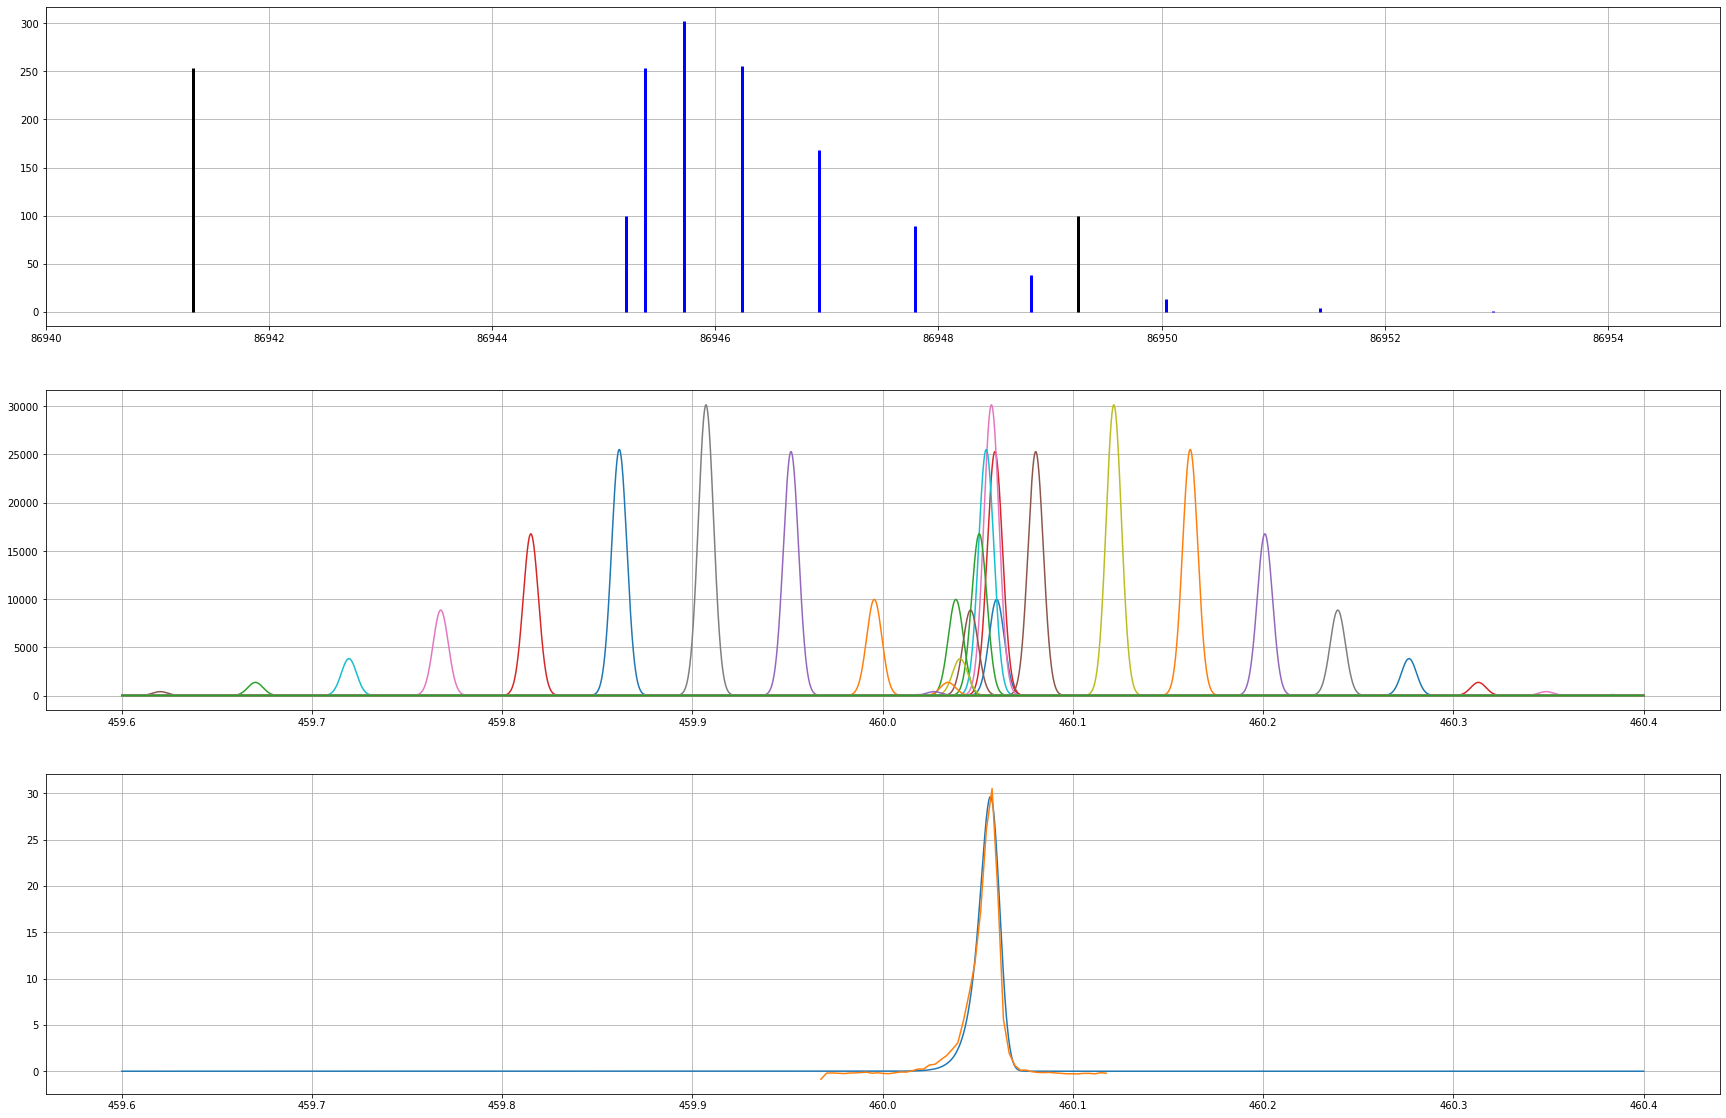

In [53]:
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
betaex1=0
gammaex1=0


#### for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0)

T01=92903
BeB1=1.9771
DeB1=0.0000065
alphaeB1=0.0254
v=0
betaeB1=0
gammaeB1=0

#### for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0)
#T02=91919.063
T02=91916.063
BeB2=1.943425
DeB2=6.17E-06
alphaeB2=0.0196
v2=0
betaeB2=0
gammaeB2=0

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)

T03=86945.2 #T0 from NIST
BeB3=1.9612 #Be from NIST
DeB3=0.0000071 #De from NIST
alphaeB3=0.0261 #alpha_e from NIST
v3=2
betaeB3=0  #Beta_e not given
gammaeB3=0 #gamma_e not given

#### for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0)
T04=65075.7
BeB4=1.6115
DeB4=0.00000733
alphaeB4=0.02325
v4=0
betaeB4=0
gammaeB4=0

Bv=Bex1+alphaex1*(v1+1/2)+gammaex1*(v1+1/2)**2
Dv=Dex1+betaex1*(v1+1/2)

Bv1=BeB1+alphaeB1*(v+1/2)+gammaeB1*(v+1/2)**2
Dv1=DeB1+betaeB1*(v+1/2)

Bv2=BeB2+alphaeB2*(v2+1/2)+gammaeB2*(v2+1/2)**2
Dv2=DeB2+betaeB2*(v2+1/2)

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
Bv3=BeB3+alphaeB3*(v3+1/2)+gammaeB3*(v3+1/2)**2
Dv3=DeB3+betaeB3*(v3+1/2)

Bv4=BeB4+alphaeB4*(v4+1/2)+gammaeB3*(v4+1/2)**2
Dv4=DeB4+betaeB4*(v4+1/2)


print('Bv=',Bv,'cm-1','Dv=',Dv,'cm-1')
#print('Bv for X to B transition=',Bv1,'cm-1','B1=',Dv1,'cm-1')
print('Bv for X to C transition=',Bv2,'cm-1','B2=',Dv2,'cm-1')
#print('Bv for X to A $\Pi$ transition=',Bv3,'cm-1','B3=',Dv3,'cm-1')
import matplotlib.pyplot as plt
#Given the following parameters
import random
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy
D4=Dv4
D3=Dv3
D2=Dv2
D1=Dv1
D=Dv
#D=0

J = 100
B = Bv
B1=Bv1
B2=Bv2
B3=Bv3
B4=Bv4
Transitionfreq=[]

def En(J,B):  return B*J*(J+1)-D*((J*(J+1))**2) # Energy function for groound state
def Em(J,B1): return B1*J*(J+1)-D1*((J*(J+1))**2) # Energy function for B sigma state
def El(J,B2): return B2*J*(J+1)-D2*((J*(J+1))**2)# Enrgy function for C sigma state
#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
def Ek(J,B3): return B3*J*(J+1)-D3*((J*(J+1))**2)# Energy function for A pi state
def Ej(J,B4): return B4*J*(J+1)-D4*((J*(J+1))**2)

'''plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')'''
val = 1.1*En(J,B)
val2= 1.1*Em(J,B1)
val3= 1.1*El(J,B2)
val4= 1.1*El(J,B2)


Qbranch_gtoe=[]
Sbranch_gtoe=[]
QBwavelength=[]
SBwavelength=[]

CQbranch_gtoe=[]
CSbranch_gtoe=[]
CObranch_gtoe=[]
CQBwavelength=[]
CSBwavelength=[]
COBwavelength=[]

PQbranch_gtoe=[]
PSbranch_gtoe=[]
PObranch_gtoe=[]
PQBwavelength=[]
PSBwavelength=[]
POBwavelength=[]


Pi_Qbranch_gtoe=[]
Pi_Sbranch_gtoe=[]
Pi_QBwavelength=[]
Pi_SBwavelength=[]


#ax.axis([0.0,10.0,0.0,val])
#ax.set_ylabel(r'$E_J$ (cm-1)')
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(En(J,B))
    #ax.text(0.6, En(J,B)+0.01*val, str1, fontsize=16, color="red")
    #ax.hlines(En(J,B), 0.0, 5, linewidth=1.8, linestyle='-', color="red")
    #Transitionfreq.append(En(J+1,B)-En(J,B))
    #print('Transition frequency',En(J+1,B)-En(J,B),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Em(J,B1))
    #ax.text(7, Em(J,B1)+0.01*val2, str1, fontsize=16, color="red")
    #ax.hlines(Em(J,B1), 7, 20, linewidth=1.8, linestyle='-', color="blue")
    Transitionfreq.append(Em(J+1,B1)-Em(J,B1))
    #print('Transition frequency',Em(J+1,B1)-Em(J,B1),'B')
    

for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(El(J,B2))
    #ax.text(7, El(J,B2)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(El(J,B2), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(El(J+1,B2)-El(J,B2))
    
################################# for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)##################################################
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ek(J,B3))
    #ax.text(7, Ek(J,B3)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(Ek(J,B3), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))

   ## Here for 4th state
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ej(J,B4))
    #ax.text(7, Ej(J,B4)+0.01*val4, str1, fontsize=16, color="red")
    #ax.hlines(Ej(J,B4), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))
    
    gtoe1=Em(J,B1)-En(J,B)+T01 # 86916.2 is taken from the paper 
    gtoe2=Em(J+2,B1)-En(J,B)+T01
    
    
    Ogtoe3=Em(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=Em(J-2,B2)-En(J,B)+T02
    
    gtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    gtoe4=El(J+2,B2)-En(J,B)+T02
    
    
    
    
    ### For C excited state, O branch
    Ogtoe3=El(J,B2)-En(J,B)+T02  # 86916.2 is taken from the paper 
    Ogtoe4=El(J-2,B2)-En(J,B)+T02

    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    gtoe5=Ek(J,B3)-En(J,B)+T03  # 86916.2 is taken from the paper 
    gtoe6=Ek(J+2,B3)-En(J,B)+T03
    gtoeO6=Ek(J-2,B3)-En(J,B)+T03
    #####################################
    gtoe7=Ej(J,B4)-En(J,B)+T04 # 86916.2 is taken from the paper 
    gtoe8=Ej(J+2,B4)-En(J,B)+T04
    
    Qbranch_gtoe.append(gtoe1/2) ## Because in the energy expression 2 photon is considered, for 1 photon, we need to devide it by 2
    Sbranch_gtoe.append(gtoe2/2)
    
    QBwavelength.append(2e7/gtoe1)
    SBwavelength.append(2e7/gtoe2)
    
    CQbranch_gtoe.append(gtoe3)
    CSbranch_gtoe.append(gtoe4)
    CObranch_gtoe.append(Ogtoe4)
    
    CQBwavelength.append((2e7/gtoe3))
    CSBwavelength.append(2e7/gtoe4)
    COBwavelength.append(2e7/Ogtoe4)
    
    #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    #PQbranch_gtoe.append(gtoe5/2)
    #PSbranch_gtoe.append(gtoe6/2)
    #PObranch_gtoe.append(gtoeO6/2)
    
    PQbranch_gtoe.append(gtoe5)
    PSbranch_gtoe.append(gtoe6)
    PObranch_gtoe.append(gtoeO6)
    
    PQBwavelength.append(2e7/gtoe5)
    PSBwavelength.append(2e7/gtoe6)
    POBwavelength.append(2e7/gtoeO6)
    
    
    
    
    
    Pi_Qbranch_gtoe.append(gtoe7/2)
    Pi_Sbranch_gtoe.append(gtoe8/2)
    
    Pi_QBwavelength.append(2e7/gtoe7)
    Pi_SBwavelength.append(2e7/gtoe8)
    
    
    
#print('Q branch for X to Pi transition and wavelength in nm \n',Qbranch_gtoe)
'''print('for 𝑋1Σ+(𝑣=0)−−−>𝐸1Π(𝑣=0) (2+1 REMPI)')
print(QBwavelength)
print('   ')
#print('S branch for X to Pi transition and wavelength in nm\n',Sbranch_gtoe) 
print(SBwavelength)
print('   ')'''
'''print('Q branch for X to C transition and wavelength in nm\n',CQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>𝐶1Σ+(𝑣=0) (2+1 REMPI)')
#print(CQBwavelength)
print('   ')
print('S branch for X to C transition and wavelength in nm\n ',CSbranch_gtoe) 
#print(CSBwavelength)'''
print('   ')
#print('Q branch for X to Bsigma transition and wavelength in nm\n',PQbranch_gtoe)
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch')
#print(PQBwavelength) # wavelength for Q branch for B state

print('   ')
#print('S branch for X to Bsigma transition and wavelength in nm\n ',PSbranch_gtoe) 
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch')
#print(PSBwavelength) # wavelength for S branch for B state
'''print('   ')
print('for 𝑋1Σ+(𝑣=0)−−−>A1Π(𝑣=0) (2+2 REMPI)')
print('   ')
#print('Q branch for X to Api transition and wavelength in nm\n',PQbranch_gtoe)
print(Pi_QBwavelength)
#print('   ')
#print('S branch for X to Api transition and wavelength in nm\n ',PSbranch_gtoe) 
print(Pi_SBwavelength)'''

str1=r"$J = "+str(J)+r"$ "
#plt.title("Energy Levels for Different value of J \n ", fontsize=30)
str2=r"$J = "+str(J)+r"$ "
str3=r"$J = "+str(J)+r"$ "


plt.figure(figsize=(20,10))

Gaussian_points=15
Gaussian_range=2
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
Temp=35
#Temp=300

#Temp=int(input("Enter the beam temperature (in K) = "))
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
#laserlinewidth=0.15  ##in cm-1 (linewidth of 3rd harmonics)
laserlinewidth=0.15
temp=[]
#Ni=[]
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(30,20))
'''fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()'''

'''def E(J,B1): return B2*J*(J+1)-D2*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B2*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    #NJ=(2*J+1)*math.exp(-dE*h*c/k*T)
    Ni.append(amp)'''
    
    
h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
#Temp=300 # in K (Temperature of molecular beam)
kb=1.38064852e-23 # in m2 kg s-2 K-1
N0=100
temp=[]
Ni=[]
def E(J,B3): return B3*J*(J+1)-D1*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B3*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    Ni.append(amp)
from scipy.stats import norm
#import statistics as stats
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
  
x_data,y_data=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_incident_2',unpack=True)    
ax1.vlines(PQbranch_gtoe,0, Ni,color='blue',lw=3)
ax1.vlines(PSbranch_gtoe,0, Ni,color='red',lw=3)
ax1.vlines(PObranch_gtoe,0, Ni,color='black',lw=3)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.grid(True)
ax1.set_xlim(86940,86955)
from scipy.stats import norm
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
###  Q branch spectra with dye laser band width

realspectra2=[]
realspectra2S=[]
realspectra2O=[]
realspectra_mean=[]
#variance=0.15
#variance=0.006
#variance=0.00189 # VAriance estimation is optimized in nanometer 0.001 nm=1 pm = 0.2 cm-1=6 GHz
#This value hasto be checked for proper resolution in the spectra
#ax2.plot(Ni)
variance=0.004
for i in range(0,J+1):
    #x = np.linspace(229.8*2, 230.05*2, 50000)
    x = np.linspace(229.8*2, 230.2*2, 50000)
    N_J=N0*((2*i)+1)*math.exp((-B3*i*(i+1))/(kb*Temp*5e22))
    gaussQ=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    gaussS=N_J*stats.norm.pdf(x, 2*PSBwavelength[i], variance)
    gaussO=N_J*stats.norm.pdf(x, 2*POBwavelength[i], variance)
    ax2.plot(x,gaussQ)
    ax2.plot(x,gaussS)
    ax2.plot(x,gaussO)
    
    realspectra2.append(gaussQ)
    realspectra2S.append(gaussS)
    realspectra2O.append(gaussO)
    
  
#############Real spectra for 
'''for i in range(0,J+1):
    x = np.linspace(45950*2, 45965*2, 5000)
    N_J=N0*((2*i)+1)*math.exp((-B2*i*(i+1))/(kb*Temp*5e22))
    gauss=N_J*stats.norm.pdf(x, CQbranch_gtoe[i], variance)
    #print(i)
    #print(gauss)
    ax2.plot(x,gauss)
    #print(N_J)
    realspectra.append(gauss)
'''
ax3.plot(x,30*(sum(realspectra2)-realspectra2[0]*0.15)/max(sum(realspectra2)))
#ax3.plot(x,(sum(realspectra2S)-realspectra2S[0]*0.15)/max(sum(realspectra2S)),color='red')
#ax3.plot(x,(sum(realspectra2O)-realspectra2O[0]*0.15)/max(sum(realspectra2O)),color='blue')
#ax3.plot(x_data+0.566,(30*y_data/max(y_data))-0.1)
ax3.plot(x_data+0.5675,(30*y_data/max(y_data))+0.5)
#ax3.set_ylim(0,1.1)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
x1,y1=np.loadtxt('20221109_OPticalpumpingdata_with_all_peaks.txt',unpack=True)
ax3.grid()
ax2.grid()

Bv= 1.9400330749999999 cm-1 Dv= 6.12147e-06 cm-1
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch
   
for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch


<Figure size 1440x720 with 0 Axes>

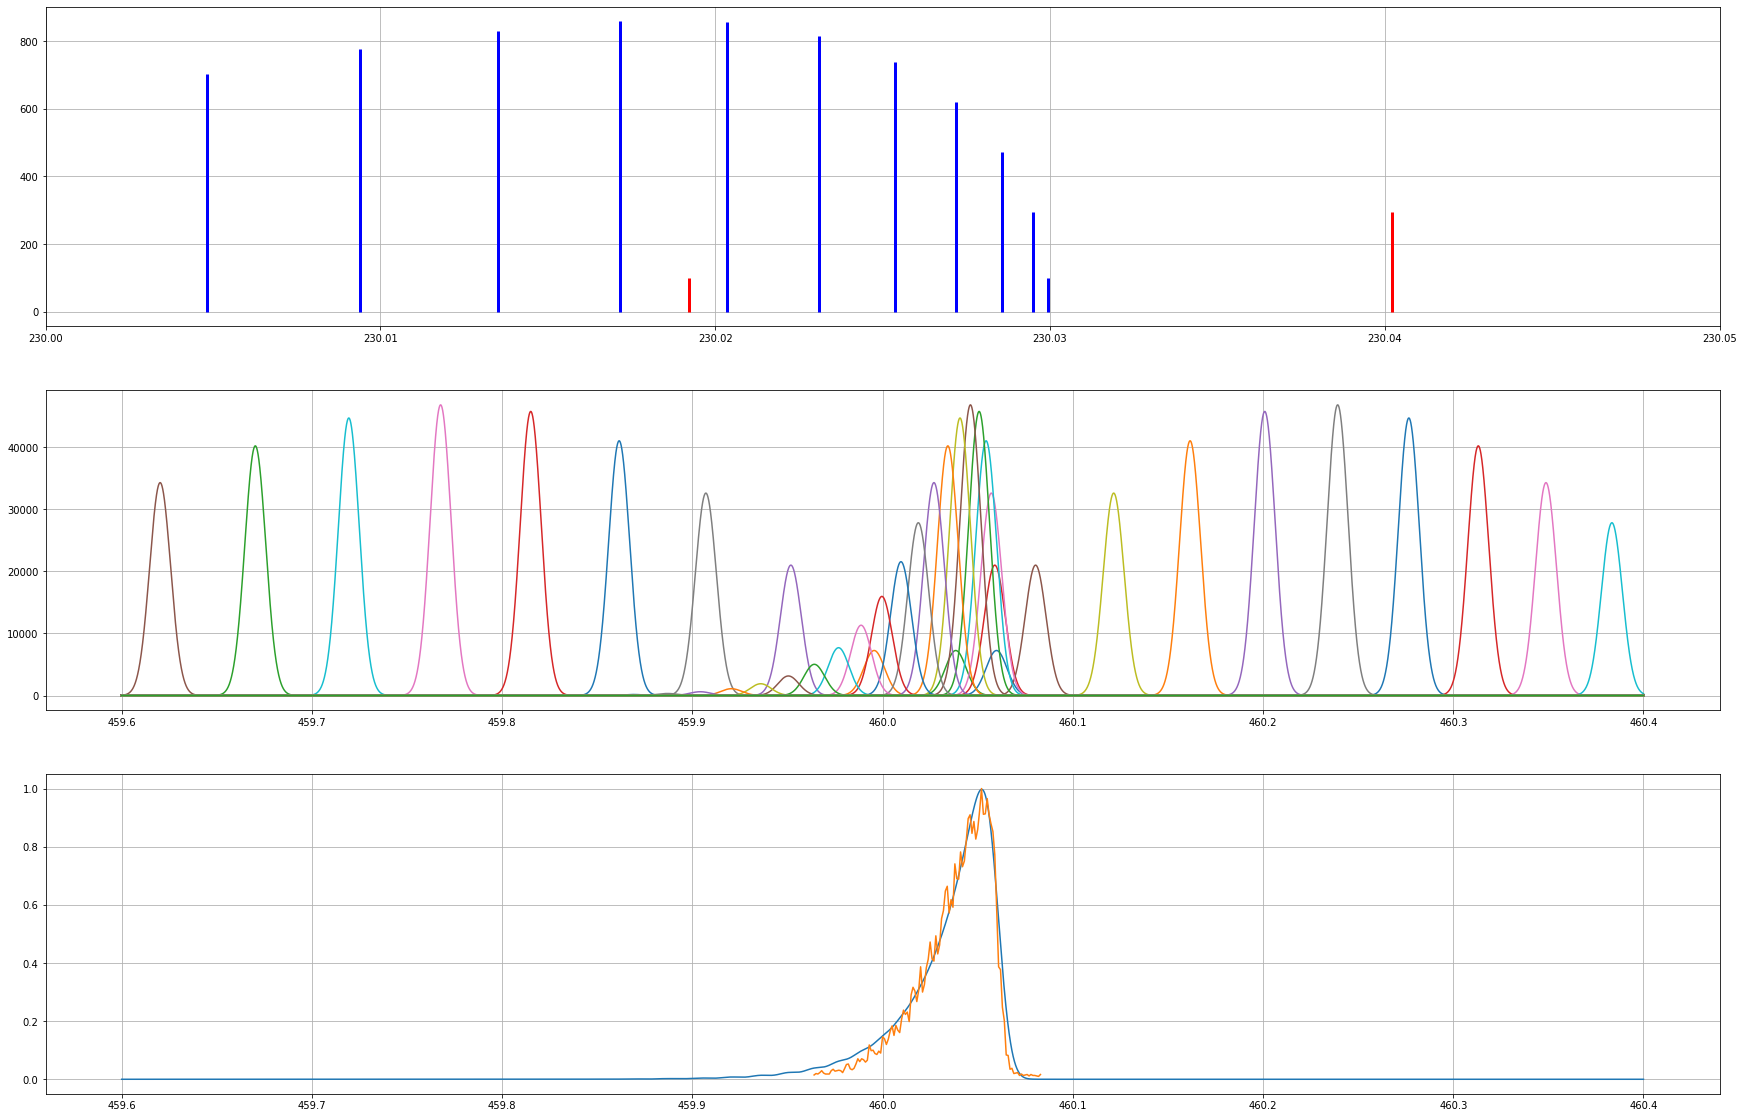

In [91]:
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
%matplotlib inline
import numpy as np
import math
#### for 𝑋1Σ+(𝑣=0) constant values
T0=0
Bex1=1.93128087
Dex1=6.12147E-06
alphaex1=0.01750441
v1=0
betaex1=0
gammaex1=0

#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
#T03=86916.16
T03=86945.2 #T0 from NIST
BeB3=1.9612 #Be from NIST
DeB3=0.0000071 #De from NIST
alphaeB3=0.0261 #alpha_e from NIST
v3=2
betaeB3=0  #Beta_e not given
gammaeB3=0 #gamma_e not given

###for 𝑋1Σ+(𝑣=0) state
Bv=Bex1+alphaex1*(v1+0.5)+gammaex1*(v1+0.5)**2
Dv=Dex1+betaex1*(v1+0.5)

#### for B1Σ+(𝑣=0)state
Bv3=BeB3+alphaeB3*(v3+0.5)+gammaeB3*(v3+0.5)**2
Dv3=DeB3+betaeB3*(v3+0.5)



print('Bv=',Bv,'cm-1','Dv=',Dv,'cm-1')
#print('Bv for X to B transition=',Bv1,'cm-1','B1=',Dv1,'cm-1')
#print('Bv for X to C transition=',Bv2,'cm-1','B2=',Dv2,'cm-1')
#print('Bv for X to A $\Pi$ transition=',Bv3,'cm-1','B3=',Dv3,'cm-1')
import matplotlib.pyplot as plt
#Given the following parameters
import random
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy

D3=Dv3
D=Dv
#D=0

J = 200
B = Bv
B3=Bv3
Transitionfreq=[]

def En(J,B):  return B*J*(J+1)-D*((J*(J+1))**2) # Energy function for groound state
 # Energy function for B sigma state
#### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
def Ek(J,B3): return B3*J*(J+1)-D3*((J*(J+1))**2)# Energy function for A pi state


PQBwavelength=[]
PSBwavelength=[]
POBwavelength=[]
Qwavelength=[]
'''for J in range(0,J+1):
    dEQbranch= Ek(J,B3)-En(J,B)+T03
    Qwavelength.append(2e7/dEQbranch)'''
#print(Qwavelength)
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(En(J,B))
    #ax.text(0.6, En(J,B)+0.01*val, str1, fontsize=16, color="red")
    #ax.hlines(En(J,B), 0.0, 5, linewidth=1.8, linestyle='-', color="red")
    #Transitionfreq.append(En(J+1,B)-En(J,B))
    #print('Transition frequency',En(J+1,B)-En(J,B),'B')
    
    
################################# for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)##################################################
for J in range(0,J+1):
    str1="$J = "+str(J)+r"$, $E_{"+str(J)+r"} = %.3f$ cm-1"%(Ek(J,B3))
    #ax.text(7, Ek(J,B3)+0.01*val3, str1, fontsize=16, color="red")
    #ax.hlines(Ek(J,B3), 20, 30, linewidth=1.8, linestyle='-', color="blue")
    #Transitionfreq.append(Ek(J+1,B2)-El(J,B2))
    
       #### for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0)
    gtoe5=Ek(J,B3)-En(J,B)+T03  # 86916.2 is taken from the paper 
    gtoe6=Ek(J+2,B3)-En(J,B)+T03
    gtoeO6=Ek(J-2,B3)-En(J,B)+T03
    #####################################
    
    PQBwavelength.append(2e7/gtoe5)
    PSBwavelength.append(2e7/gtoe6)
    POBwavelength.append(2e7/gtoeO6)
    
    

print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) Q-Branch')
#print(PQBwavelength) # wavelength for Q branch for B state

print('   ')
#print('S branch for X to Bsigma transition and wavelength in nm\n ',PSbranch_gtoe) 
print('for 𝑋1Σ+(𝑣=0)−−−>B1Σ+(𝑣=0) (2+1 REMPI) S-Branch')
#print(PSBwavelength) # wavelength for S branch for B state

str1=r"$J = "+str(J)+r"$ "
#plt.title("Energy Levels for Different value of J \n ", fontsize=30)
str2=r"$J = "+str(J)+r"$ "
str3=r"$J = "+str(J)+r"$ "


plt.figure(figsize=(20,10))


h=6.62607004e-34 # in m2 kg / s
c=3e8 # speed of light
Temp=295
#Temp=int(input("Enter the beam temperature (in K) = "))
kb=1.38e-23 # in J/K
N0=100
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(30,20))

Ni=[]
def E(J,B3): return B3*J*(J+1)-D1*((J*(J+1))**2)
for J in range (0,J+1):
    NJ=N0*((2*J)+1)*math.exp((-B3*J*(J+1))/(kb*Temp*5e22))## 5e22 is multiplied for J to cm-1 conversion
    amp=NJ
    Ni.append(amp)
from scipy.stats import norm
#import statistics as stats
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
  
x_data,y_data=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_incident_2',unpack=True)   
ax1.vlines(PQBwavelength,0, Ni,color='blue',lw=3)
ax1.vlines(POBwavelength,0, Ni,color='red',lw=3)
ax1.vlines(PSBwavelength,0, Ni,color='black',lw=3)
ax1.vlines(Qwavelength,0, Ni,color='green',lw=3)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.grid(True)
#ax1.set_xlim(86940,86955)
from scipy.stats import norm
import scipy.stats as stats
import math

x_axis = np.arange(0, 1, 0.01)
###  Q branch spectra with dye laser band width

realspectra23=[]
realspectra2S=[]
realspectra2O=[]
realspectra_mean=[]
#variance=0.15
#variance=0.006
#variance=0.00189 # VAriance estimation is optimized in nanometer 0.001 nm=1 pm = 0.2 cm-1=6 GHz
#This value hasto be checked for proper resolution in the spectra
#ax2.plot(Ni)
variance=0.0055
for i in range(0,J+1):
    #x = np.linspace(229.8*2, 230.05*2, 50000)
    x = np.linspace(229.8*2, 230.2*2, 50000)
    N_J=N0*((2*i)+1)*math.exp(-(B3*i*(i+1))/(kb*Temp*2.8e22))
    gaussQ=N_J*stats.norm.pdf(x, 2*PQBwavelength[i], variance)
    gaussS=N_J*stats.norm.pdf(x, 2*PSBwavelength[i], variance)
    gaussO=N_J*stats.norm.pdf(x, 2*POBwavelength[i], variance)
    ax2.plot(x,gaussQ)
    ax2.plot(x,gaussS)
    ax2.plot(x,gaussO)
    
    realspectra23.append(gaussQ)
    realspectra2S.append(gaussS)
    realspectra2O.append(gaussO)
    

raw_data1=np.loadtxt('003_meas_CO_ground_state_B_X_thermal_beam')
#raw_data1=np.loadtxt('high_power_co_photoacaustic_spectra_003')
ax3.plot(x,(sum(realspectra23)-realspectra23[0]*0.15)/max(sum(realspectra23)))

#ax3.plot(x_data+0.5675,(30*y_data/max(y_data))+0.5)
ax3.plot(raw_data1[0:,0]+0.563,(raw_data1[0:,4]/np.max(raw_data1[0:,4])))

ax1.set_xlim(230,230.05)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
x1,y1=np.loadtxt('20221109_OPticalpumpingdata_with_all_peaks.txt',unpack=True)
ax3.grid()
ax2.grid()
#print(x)

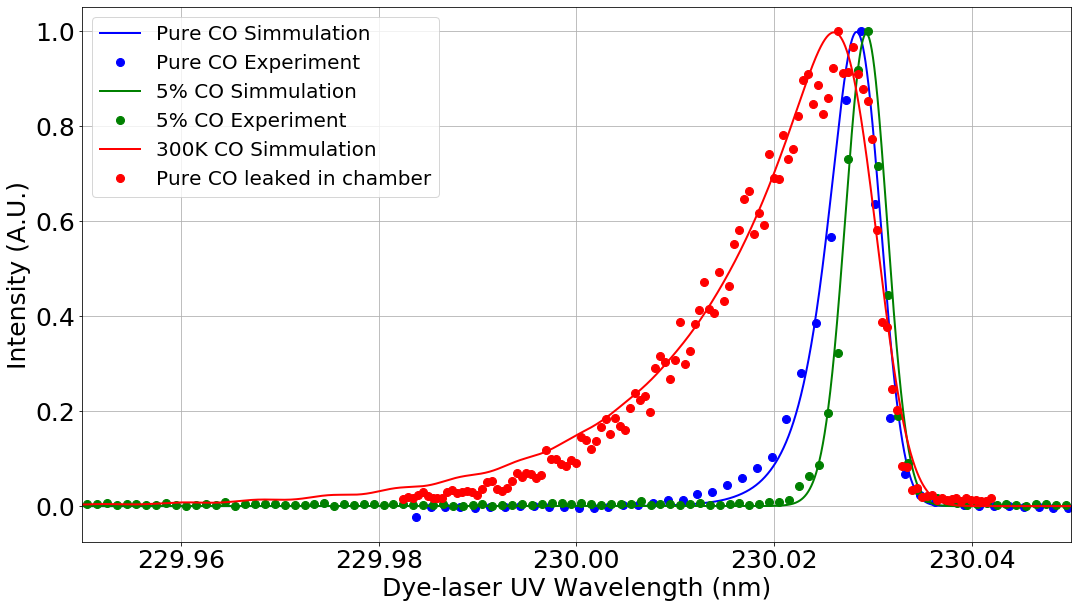

In [88]:
def cm(value): 
    return value/2.54
fig1,ax = plt.subplots(1,1, figsize=(cm(45),cm(25)))
#ax.vlines(PQbranch_gtoe,0, Ni,color='blue',lw=3)

ax.plot(x/2,(sum(realspectra2)-(realspectra2[0])*0.02)/max(sum(realspectra2)),color="blue",lw=2,label='Pure CO Simmulation')
ax.plot((x_data+0.5675)/2,((y_data+4)/max(y_data+4)),'o',color='blue',ms=8,label='Pure CO Experiment')

ax.plot(x/2,(sum(realspectra1)-realspectra1[0]*0.02)/max(sum(realspectra1)),color="green",lw=2,label='5% CO Simmulation')
ax.plot((x_data1+0.563)/2,((y_data1-0.001)/max(y_data1-0.001)),'o',color='green',ms=8,label='5% CO Experiment')

ax.plot(x/2,(sum(realspectra23)-realspectra23[0]*0.15)/max(sum(realspectra23)),color="red",lw=2,label='300K CO Simmulation')
ax.plot((raw_data1[0:,0]+0.5639)/2,(raw_data1[0:,4]/np.max(raw_data1[0:,4])),'o',color='red',ms=8,label='Pure CO leaked in chamber')
#ax.vlines(PQbranch_gtoe,0, Ni,color='green',lw=3)
ax.grid()
ax.set_xlabel("Dye-laser UV Wavelength (nm)",fontsize=25)
ax.set_ylabel("Intensity (A.U.)",fontsize=25)
ax.set_xlim(459.9/2,460.1/2)
ax.legend(fontsize=20,loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.ticklabel_format(useOffset=False)
fig1.savefig('Beamtemperaturesumulation_pure_CO.pdf',bbox_inches='tight')
#print(realspectra23)

#  molecular beam format9ion

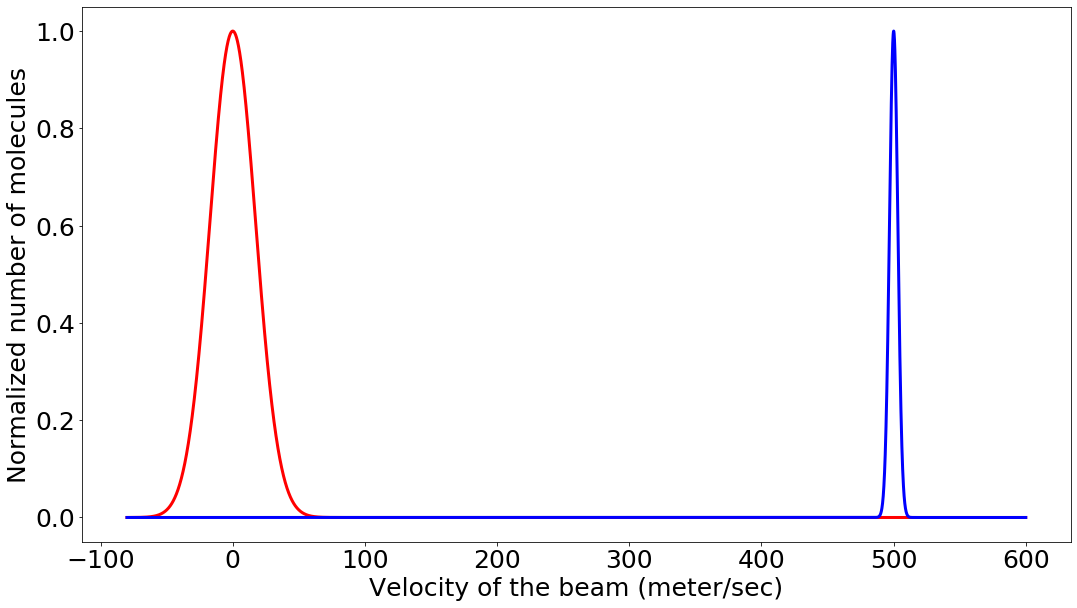

In [15]:
def cm(value): 
    return value/2.54
fig1,ax = plt.subplots(1,1, figsize=(cm(45),cm(25)))
m=1
k=1
T1=300
T2=10
v1=0
v2=500
Nt=1
N0=[]
N0_c=[]
vt=[]
for vz in np.arange (-80,600,0.1): 
        N_c=Nt*math.exp((-m/(2*k*T2))*(v2-vz)**2)
        N=Nt*math.exp((-m/(2*k*T1))*(v1-vz)**2)
        N0.append(N)
        N0_c.append(N_c)
        vt.append(vz)
ax.plot(vt,N0,color='red',lw=3)
ax.plot(vt,N0_c,color='blue',lw=3)
ax.set_xlabel("Velocity of the beam (meter/sec)",fontsize=25)
ax.set_ylabel("Normalized number of molecules",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
#ax.grid()
#fig1.savefig('cooling_in_molecular_in_beam2.pdf',bbox_inches='tight')

#ax.set_xlim(400,600)

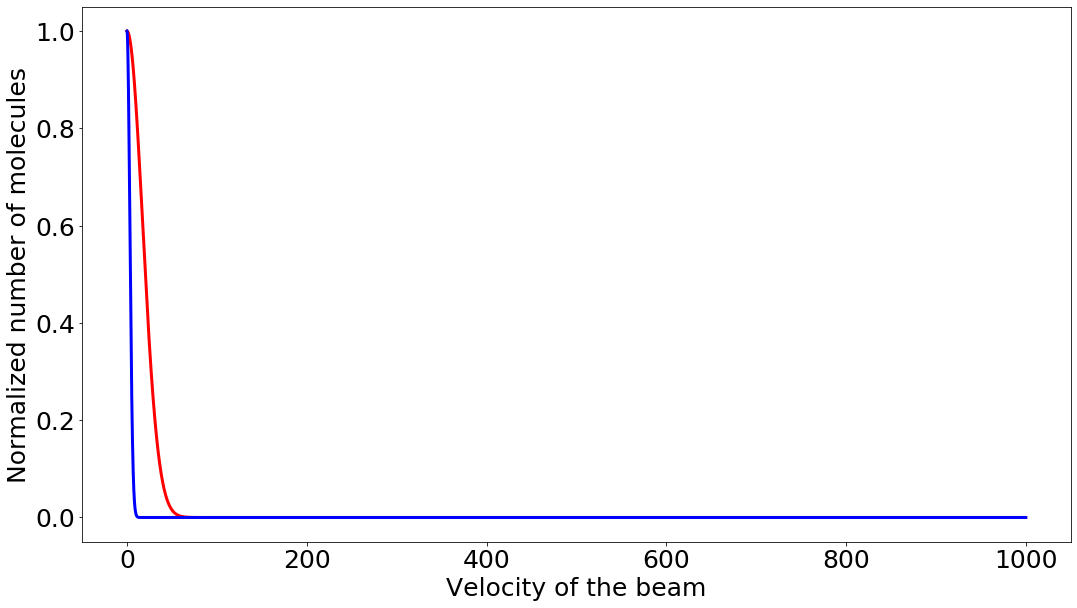

In [12]:
def cm(value): 
    return value/2.54
fig1,ax = plt.subplots(1,1, figsize=(cm(45),cm(25)))
m=1
k=1
T1=300
T2=10
v1=0
Nt=1
N0=[]
N0_c=[]
vt=[]
for vz in np.arange (0,1000,0.1): 
        N_c=Nt*math.exp((-m/(2*k*T2))*(v-vz)**2)
        N=Nt*math.exp((-m/(2*k*T1))*(v-vz)**2)
        N0.append(N)
        N0_c.append(N_c)
        vt.append(vz)
ax.plot(vt,N0,color='red',lw=3)
ax.plot(vt,N0_c,color='blue',lw=3)
ax.set_xlabel("Velocity of the beam",fontsize=25)
ax.set_ylabel("Normalized number of molecules",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
fig1.savefig('cooling_in_molecular_in_beam.pdf',bbox_inches='tight')
#ax.set_xlim(400,600)

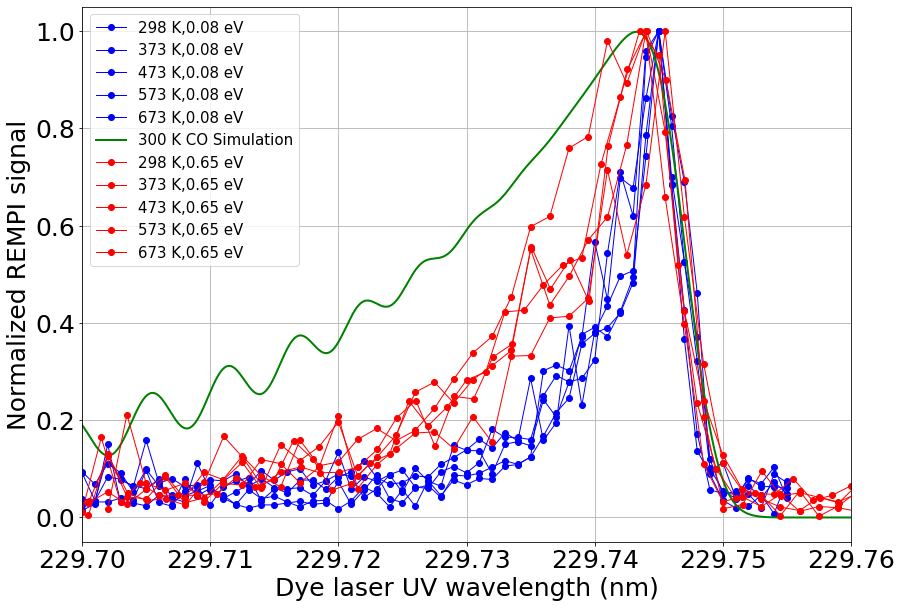

In [11]:
%matplotlib inline
def cm(value): 
    return value/2.54
#rcParams['figure.figsize'] = cm(10),cm(10)
import matplotlib.pyplot as plt
import numpy as np
import math
x00,y00=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg25deg', usecols=(0,4),unpack=True)
x01,y01=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg100deg', usecols=(0,4),unpack=True)
x02,y02=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg200deg1', usecols=(0,4),unpack=True)
x03,y03=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg300deg1', usecols=(0,4),unpack=True)
x04,y04=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_ON_avg400deg1', usecols=(0,4),unpack=True)
#x05,y05=np.loadtxt('20230418_Surface_scattering_with_pure_CO_beam_surface_OFF_avg2', usecols=(0,4),unpack=True)

x10,y10=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceON55deg1650V32avg1', usecols=(0,4),unpack=True)
x11,y11=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceON110deg1650V32avg1', usecols=(0,4),unpack=True)
x12,y12=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceON210deg1650V32avg1', usecols=(0,4),unpack=True)
x13,y13=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceON310deg1650V32avg2', usecols=(0,4),unpack=True)
x14,y14=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceON400deg1650V32avg2', usecols=(0,4),unpack=True)
#x15,y15=np.loadtxt('20230417_Surface_scattering_expt_scattered_beam_surfaceOFFdeg1650V32avg2', usecols=(0,4),unpack=True)


fig2,ax = plt.subplots(1,1, figsize=(cm(35),cm(25)))
#plt.plot(x00,y00/max(y00),'o-',color='r',label='25deg',lw=1)
#plt.plot(x01,y01/max(y01),'o-',color='b',label='100deg',lw=1)
#plt.plot(x02,y02/max(y02),'o-',color='g',label='200deg',lw=1)
#plt.plot(x03,y03/max(y03),'o-',color='y',label='300deg',lw=1)
#plt.plot(x04,y04/max(y04),'o-',color='k',label='400deg',lw=1)
ax.plot(x00/2,(y00-0.08)/max(y00-0.08),'o-',color='b',label='298 K,0.08 eV',lw=1)
ax.plot(x01/2,(y01-0.08)/max(y01-0.08),'o-',color='b',label='373 K,0.08 eV',lw=1)
ax.plot(x02/2,(y02-0.08)/max(y02-0.08),'o-',color='b',label='473 K,0.08 eV',lw=1)
ax.plot(x03/2,(y03-0.08)/max(y03-0.08),'o-',color='b',label='573 K,0.08 eV',lw=1)
ax.plot(x04/2,(y04-0.08)/max(y04-0.08),'o-',color='b',label='673 K,0.08 eV',lw=1)
#plt.plot(x05,y05/max(y05),'o-',color='c',label='incident',lw=1)
ax.plot((x/2)-0.283,(((sum(realspectra23)-realspectra23[0]*0.15)))/max(sum(realspectra23)),color="green",lw=2,label='300 K CO Simulation')
ax.plot((x10-0.005)/2,(y10-0.08)/(max(y10)-0.08),'o-',color='r',label='298 K,0.65 eV',lw=1)
ax.plot((x11-0.003)/2,(y11-0.08)/(max(y11)-0.08),'o-',color='r',label='373 K,0.65 eV',lw=1)
ax.plot((x12-0.002)/2,(y12-0.08)/(max(y12)-0.08),'o-',color='r',label='473 K,0.65 eV',lw=1)
ax.plot((x13+0.001)/2,(y13-0.08)/(max(y13)-0.08),'o-',color='r',label='573 K,0.65 eV',lw=1)
ax.plot((x14-0.0019)/2,(y14-0.08)/(max(y14)-0.08),'o-',color='r',label='673 K,0.65 eV',lw=1)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_ylabel('Normalized REMPI signal',fontsize=25)
ax.set_xlabel('Dye laser UV wavelength (nm)',fontsize=25)
#plt.plot(x15,y15/max(y15),color='c',label='incident')
ax.legend()
ax.grid()
ax.set_xlim(229.700,229.76)
ax.ticklabel_format(useOffset=False)
ax.legend(fontsize=15)
fig2.savefig('Scattering_datafor_pureand5percent.png',bbox_inches='tight',dpi=500)

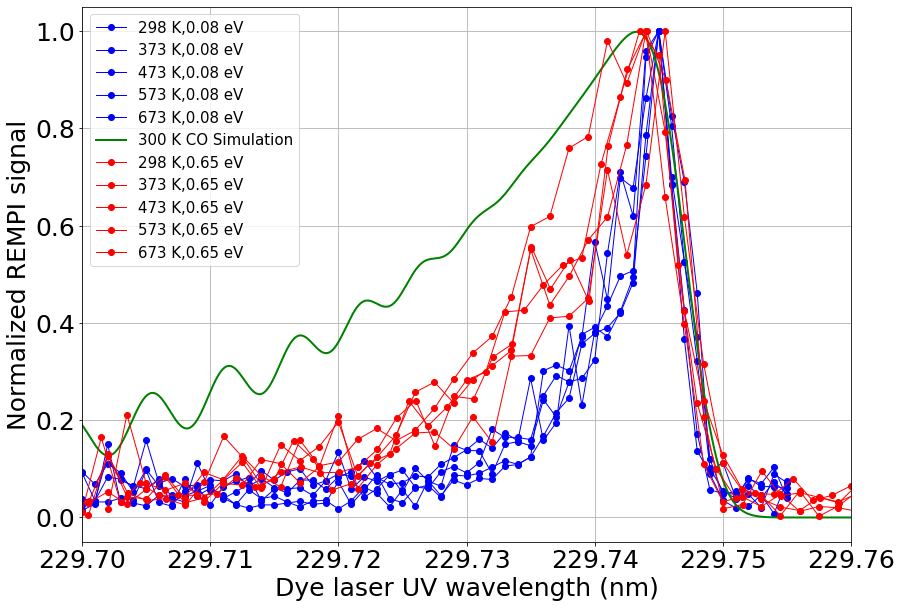